**Team Name : Anonymous2**

NAVEEN KUMAR JAKUVA PREMKUMAR - A0212252X

SUDEEP KRISHNA NAGARAJAN - A0212219R

SIVA ANANDH MUNEESWARAN - A0212230E

Github repo URL : https://github.com/jpnaveenkumar/DataMiningProject

In [126]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs5228/train.csv
/kaggle/input/cs5228/test.csv
/kaggle/input/cs5228/sample_submission.csv


In [127]:
from sklearn.ensemble import RandomForestClassifier # random forest
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier # gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import Pool, CatBoostClassifier, cv, CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from imblearn.over_sampling import SMOTE
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
label_encoder = preprocessing.LabelEncoder()

In [128]:
data = pd.read_csv("/kaggle/input/cs5228/train.csv")
test = pd.read_csv("/kaggle/input/cs5228/test.csv")
data_variations = []

Data cleaning starts here,we removed the duplicated rows and then we have two variations

    i) Missing values removed
    
    ii) Missing values handled
    
These two variations of datasets are maintained in array of datasets and subjected to the further analysis

In [129]:
# data cleaning starts
train_noduplicates = data.drop_duplicates()
print("count of rows in dataset before cleaning : "+str(len(data)))
print("count of rows in dataset after cleaning : "+str(len(train_noduplicates)))

count of rows in dataset before cleaning : 24421
count of rows in dataset after cleaning : 24406


In [130]:
train_clean1 = train_noduplicates.copy()
train_clean1 = train_clean1[ train_clean1["workclass"] != " ?"]
train_clean1 = train_clean1[ train_clean1["occupation"] != " ?"]
train_clean1 = train_clean1[ train_clean1["native-country"] != " ?"]
train_clean1.reset_index(drop=True,inplace = True)
print("count of rows in dataset before cleaning : "+str(len(train_noduplicates)))
print("count of rows in dataset after cleaning : "+str(len(train_clean1)))
data_variations.append(train_clean1.copy())

count of rows in dataset before cleaning : 24406
count of rows in dataset after cleaning : 22619


In [131]:
train_clean2 = train_noduplicates.replace(to_replace=" ?",value=np.nan)
train_clean2.fillna(list(train_noduplicates.workclass.mode())[0],inplace = True)
train_clean2.fillna(list(train_noduplicates.occupation.mode())[0],inplace = True)
train_clean2.fillna(list(train_noduplicates["native-country"].mode())[0],inplace = True)
print("count of rows in dataset after cleaning : "+str(len(train_clean2)))
data_variations.append(train_clean2.copy())

count of rows in dataset after cleaning : 24406


Here we are performing the Outlier Analysis the above created two variations of dataset.

    i) Z-score
    ii) Box-plot
    iii) IQR
    
Finally we removed the rows with z-score metric having the threshold value as 3, ie. data points that are three standard deviations away from mean are removed.

-----------data variation---------
Z-score outlier count for age : 78
Z-score outlier count for fnlwgt : 234
Z-score outlier count for capital-gain : 161
Z-score outlier count for capital-loss : 1028
Z-score outlier count for hours-per-week : 246
Z-score outlier count for education-num : 0


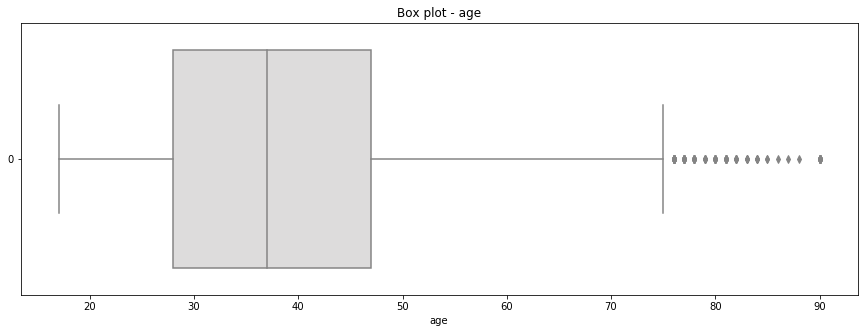

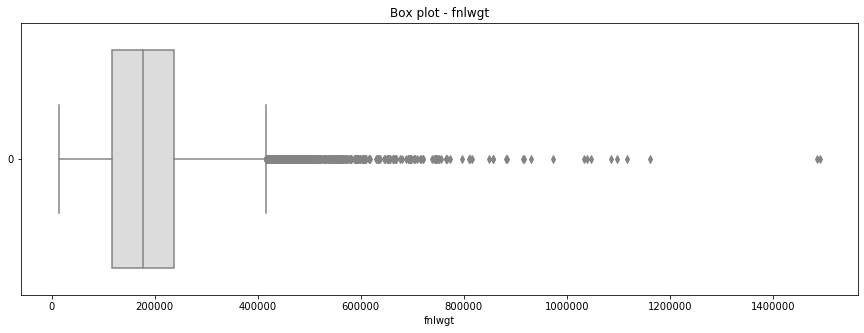

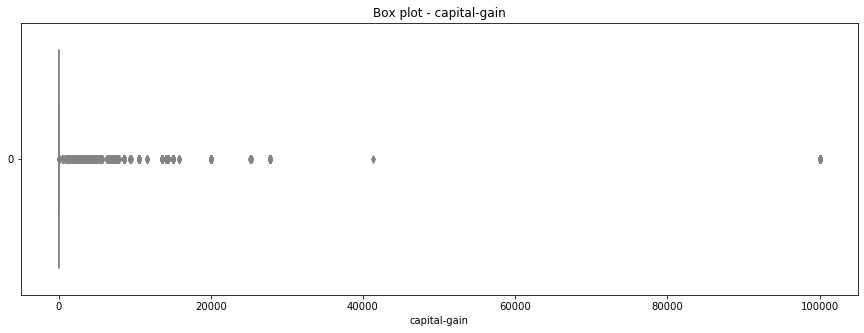

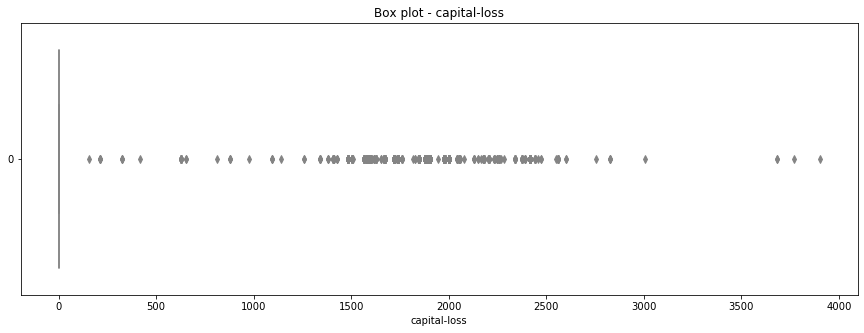

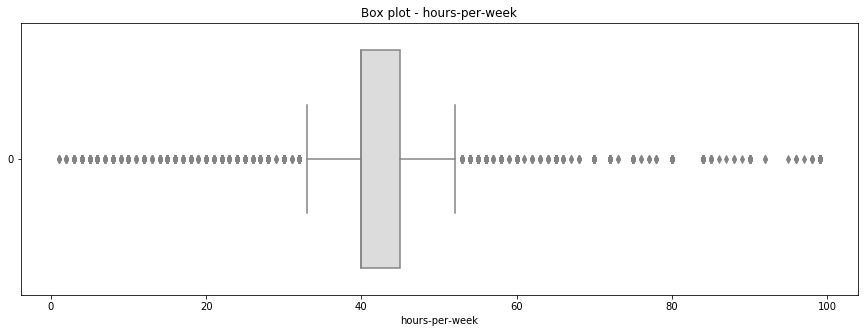

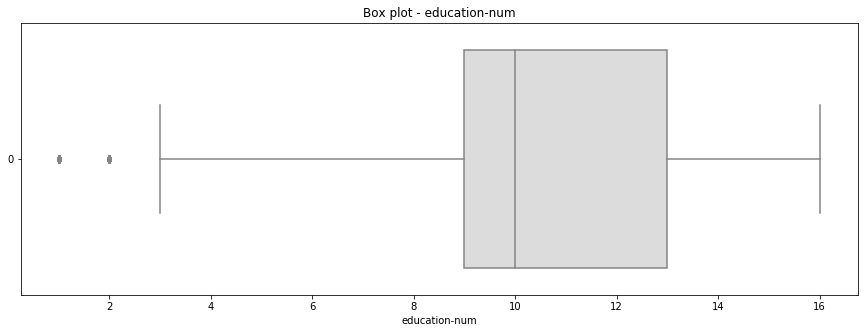

Inter quartile range outlier count for age : 116
Inter quartile range outlier count for fnlwgt : 2780
Inter quartile range outlier count for capital-gain : 1908
Inter quartile range outlier count for capital-loss : 1061
Inter quartile range outlier count for hours-per-week : 2546
Inter quartile range outlier count for education-num : 0
---------count of rows in dataset after cleaning---------- : 20909

-----------data variation---------
Z-score outlier count for age : 84
Z-score outlier count for fnlwgt : 250
Z-score outlier count for capital-gain : 175
Z-score outlier count for capital-loss : 1102
Z-score outlier count for hours-per-week : 263
Z-score outlier count for education-num : 0


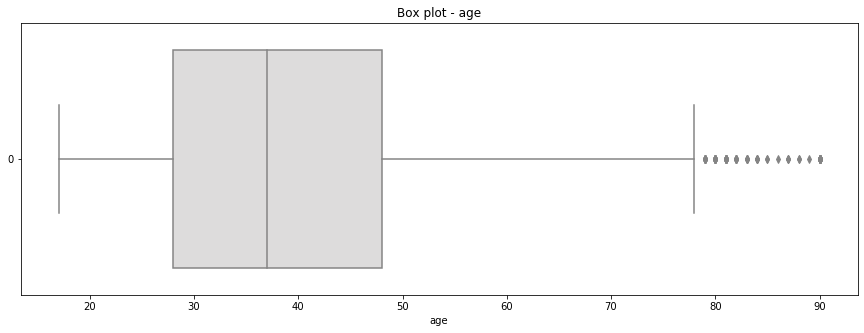

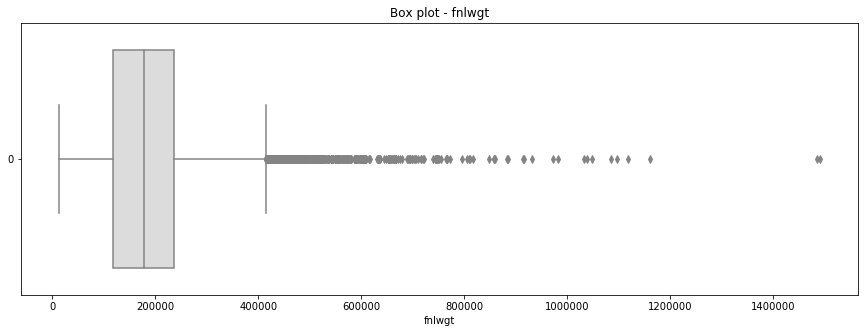

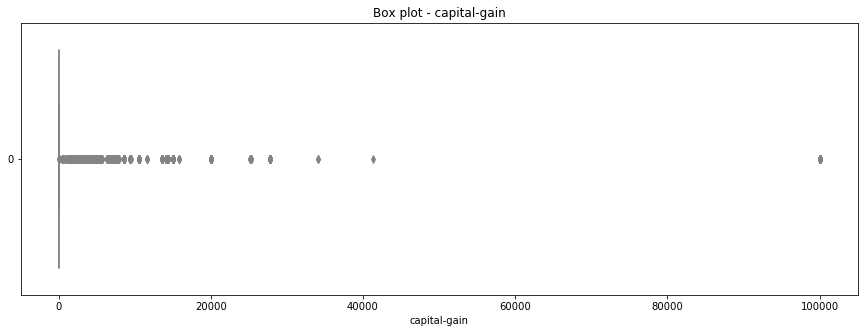

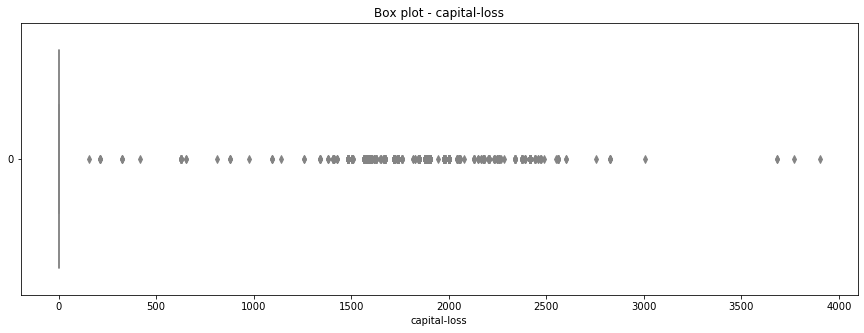

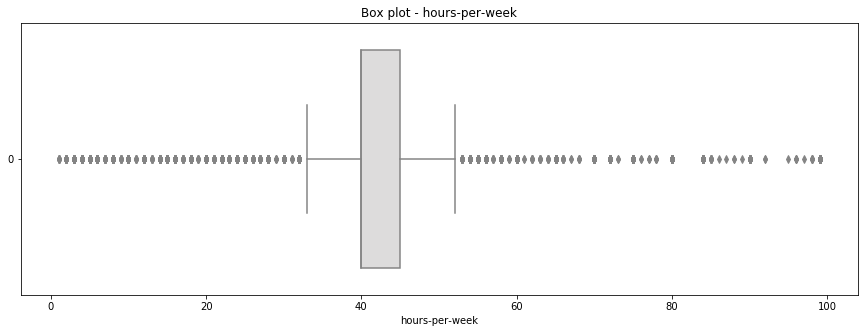

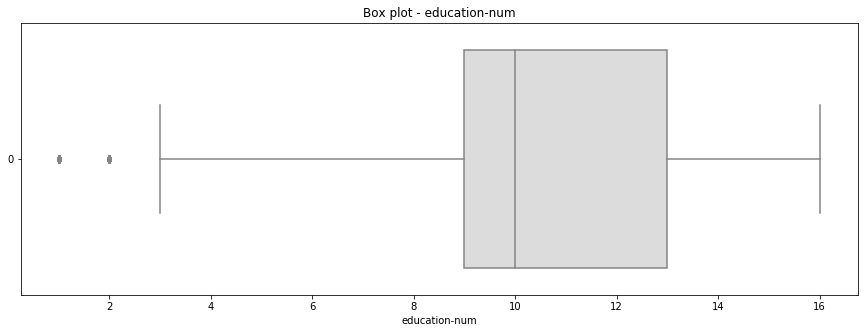

Inter quartile range outlier count for age : 96
Inter quartile range outlier count for fnlwgt : 3009
Inter quartile range outlier count for capital-gain : 2031
Inter quartile range outlier count for capital-loss : 1135
Inter quartile range outlier count for hours-per-week : 2664
Inter quartile range outlier count for education-num : 0
---------count of rows in dataset after cleaning---------- : 22569



In [132]:
from scipy import stats
columns = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week","education-num"]
functions = ["zscore","box-plot","IQR","clean"]
data_variations_temp = []
for data_variation in data_variations:
    print("-----------data variation---------")
    for function in functions:
        for column in columns:
            if(function == "zscore"):
                z = stats.zscore(data_variation[column])
                outlier_count = len(data_variation[z > 3])
                print("Z-score outlier count for "+column+" : "+str(outlier_count))

            if(function == "box-plot"):
                fig,ax = plt.subplots()
                sns.boxplot(data=data_variation[column],palette='coolwarm',orient='h')
                fig.set_size_inches(15,5)
                plt.title('Box plot - '+column)
                plt.xlabel(column)
                plt.show()

            if(function == "IQR"):
                quantile_25 = data_variation[column].quantile(0.25)
                quantile_75 = data_variation[column].quantile(0.75)
                iqr = quantile_75 - quantile_25
                upper_limit = (1.5 * iqr) + quantile_75
                lower_limit = (1.5 * iqr) - quantile_25
                outlier_count = len(data_variation[data_variation[column] > upper_limit]) + len(data_variation[data_variation[column] < lower_limit])
                print("Inter quartile range outlier count for "+column+" : "+str(outlier_count))

            if(function == "clean"):
                z = stats.zscore(data_variation[column])
                data_variation = data_variation[z < 3]
    data_variations_temp.append(data_variation)
    print("---------count of rows in dataset after cleaning---------- : "+str(len(data_variation))+"\n")
data_variations = data_variations_temp

Data Transformations starts here and it is applied to the above generated two variations of the dataset

    1) i) conversion of continuous variable to categorical variable
       ii) Normalization of the data
 
The above generated 2 variations is passed through 1)i) and 1)ii) totally we get 4 variations as follows : 

variation 1 : "missing values dropped - cut applied",

variation 2 : "fillna done to missing values - cut applied",

variation 3 : "missing values dropped - data normalized using scaler",

variation 4 : "fillna done to missing values - data normalized using scaler"

In [133]:
# data transformation starts here
data_variations_transformations = []

In [134]:
for data_variation in data_variations:
    train_clean1_temp = data_variation.iloc[0:,:13].copy()
    train_clean1_temp["education-num"] = pd.cut(train_clean1_temp["education-num"],[0,5,10,12,17],labels = ["junior-school","school","high-school","college"])
    train_clean1_temp["hours-per-week"] = pd.cut(train_clean1_temp["hours-per-week"],[0,30,70,100],labels = ["less-hours","medium-hours","high-hours"])
    train_clean1_temp["fnlwgt"] = pd.qcut(train_clean1_temp['fnlwgt'], q=3, labels = ['lowfnlwgt', 'medfnlwgt', 'highfnlwgt'],duplicates='drop')
    train_clean1_temp["age"] = pd.qcut(train_clean1_temp['age'], q=3, labels = ['young', 'adult', 'old'],duplicates='drop')
    data_variations_transformations.append(train_clean1_temp.copy())

In [135]:
scalar_type = "minmax"
for data_variation in data_variations:
    scaler = None
    if(scalar_type == "minmax"):
        scaler = preprocessing.MinMaxScaler()
    elif(scalar_type == "standard"):
        scaler = preprocessing.StandardScaler()
    elif(scalar_type == "robust"):
        scaler = preprocessing.RobustScaler()
    elif(scalar_type == "normalizer"):
        scaler = preprocessing.Normalizer()
    train_clean2_temp = data_variation.iloc[0:,:13].copy()
    train_clean2_temp.reset_index(drop=True, inplace=True)
    temp = pd.DataFrame({"age":train_clean2_temp["age"],"fnlwgt":train_clean2_temp["fnlwgt"],"education-num":train_clean2_temp["education-num"],"hours-per-week":train_clean2_temp["hours-per-week"],"capital-gain":train_clean2_temp["capital-gain"],"capital-loss":train_clean2_temp["capital-loss"]})
    scaled_df = scaler.fit_transform(temp)
    scaled_df = pd.DataFrame(scaled_df, columns= list(temp.columns))
    train_clean2_temp = pd.DataFrame({"workclass":train_clean2_temp["workclass"],"education":train_clean2_temp["education"],"marital-status":train_clean2_temp["marital-status"],"occupation":train_clean2_temp["occupation"],"relationship":train_clean2_temp["relationship"],"sex":train_clean2_temp["sex"],"native-country":train_clean2_temp["native-country"],"age":scaled_df["age"],"fnlwgt":scaled_df["fnlwgt"],"education-num":scaled_df["education-num"],"hours-per-week":scaled_df["hours-per-week"],"capital-gain":scaled_df["capital-gain"],"capital-loss":scaled_df["capital-loss"]})
    data_variations_transformations.append(train_clean2_temp.copy())

The feature selection is done fews cells below here, but removal of columns is done here
    
    Pearson correlation coefficient is applied and absolute values corresponding to the column lesser than 0.01 removed

In [136]:
#Feature selection done here
data_variations_transformation_temp = []
for data_variations_transformation in data_variations_transformations:
    del data_variations_transformation["workclass"]
    del data_variations_transformation["native-country"]
    data_variations_transformation_temp.append(data_variations_transformation.copy())
data_variations_transformation = data_variations_transformation_temp

Encodings are applied to the above generated 4 variations of the dataset.

    2) i) Label Encoding
       ii) One Hot Encoding
       
The above generated 4 variations is passed through 2)i) and 2)ii) totally we get 8 variations as follows : 

variation 1 : "missing values dropped - cut applied - Label Encoder used",

variation 2 : "fillna done to missing values - cut applied - Label Encoder used",

variation 3 : "missing values dropped - data normalized using scaler - Label Encoder used",

variation 4 : "fillna done to missing values - data normalized using scaler - Label Encoder used"

variation 5 : "missing values dropped - cut applied - getDummies used",

variation 6 : "fillna done to missing values - cut applied - getDummies used",

variation 7 : "missing values dropped - data normalized using scaler - getDummies used",

variation 8 : "fillna done to missing values - data normalized using scaler - getDummies used"

In [137]:
data_variations_encodings = []

In [138]:
for data_variations_transformation in data_variations_transformations:
    train_clean1_temp = data_variations_transformation.copy()
    train_clean1_temp['age'] = label_encoder.fit_transform(train_clean1_temp['age'])
    #train_clean1_temp['workclass'] = label_encoder.fit_transform(train_clean1_temp['workclass'])
    train_clean1_temp['fnlwgt'] = label_encoder.fit_transform(train_clean1_temp['fnlwgt'])
    train_clean1_temp['education'] = label_encoder.fit_transform(train_clean1_temp['education'])
    train_clean1_temp['education-num'] = label_encoder.fit_transform(train_clean1_temp['education-num'])
    train_clean1_temp['marital-status'] = label_encoder.fit_transform(train_clean1_temp['marital-status'])
    train_clean1_temp['occupation'] = label_encoder.fit_transform(train_clean1_temp['occupation'])
    train_clean1_temp['relationship'] = label_encoder.fit_transform(train_clean1_temp['relationship'])
    train_clean1_temp['sex'] = label_encoder.fit_transform(train_clean1_temp['sex'])
    train_clean1_temp['capital-gain'] = label_encoder.fit_transform(train_clean1_temp['capital-gain'])
    train_clean1_temp['capital-loss'] = label_encoder.fit_transform(train_clean1_temp['capital-loss'])
    train_clean1_temp['hours-per-week'] = label_encoder.fit_transform(train_clean1_temp['hours-per-week'])
    #train_clean1_temp['native-country'] = label_encoder.fit_transform(train_clean1_temp['native-country'])
    data_variations_encodings.append(train_clean1_temp.copy())

In [139]:
for data_variations_transformation in data_variations_transformations:
    train_clean1_temp = data_variations_transformation.copy()
    train_clean1_temp = pd.get_dummies(train_clean1_temp)
    data_variations_encodings.append(train_clean1_temp.copy())

In [140]:
# # Feature selection
# for index,data_variations_encoding in enumerate(data_variations_encodings):
#     if len(data_variations_encoding) == 20909:
#         data_variations_encoding["exceeds50K"] = data_variations[0]["exceeds50K"]
#     elif len(data_variations_encoding) == 22569:
#         data_variations_encoding["exceeds50K"] = data_variations[1]["exceeds50K"]
#     cor = data_variations_encoding.corr()
#     abs_cor = abs(cor["exceeds50K"])
#     if(index < 4):
#         cor_dict = abs_cor[abs_cor>=0.01].to_dict()
#     else:
#         cor_dict = abs_cor[abs_cor>=0.005].to_dict()
#     trusted_columns = list(cor_dict.keys())
#     trusted_columns.remove("exceeds50K")
#     print("count of trusted columns "+str(len(trusted_columns)))
#     print(trusted_columns)

Data modeling starts here, we passed the 8 variations of the data to the below models

    1) RandomForestClassifier
    2) XGBoost Classifier
    3) CatBoost Classifier
    4) AdaBoost Classifier

With the Hyper parameters tuned which we have presented in the report with some more additional models like Light GBM

**For quick running we have disabled the Hyper paramter tuning code in the following cell**

In [ ]:
# data modeling starts here
index = 1
performances = []
param_grid_GBC = {
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2,3,4],
    'learning_rate': [0.1,0.01,0.001,0.0001]
}
param_grid_RF = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'n_estimators': [100, 200, 300]
}
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['application'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 80
params['min_data'] = 50
params['max_depth'] = -1
params['max_bin'] = 400
#sm = SMOTE(random_state = 33)
for data_variations_encoding in data_variations_encodings:
    models = {}
    print("data variation : "+str(index))
    X_train, X_test, y_train, y_test, index = None,None,None,None, index+1
    if len(data_variations_encoding) == 20909:
        X_train, X_test, y_train, y_test = train_test_split(data_variations_encoding, data_variations[0]["exceeds50K"], test_size=0.2, random_state = 3)
    elif len(data_variations_encoding) == 22569:
        X_train, X_test, y_train, y_test = train_test_split(data_variations_encoding, data_variations[1]["exceeds50K"], test_size=0.2, random_state = 3)
    #X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    obj = {"model":"Logistic Regression","F1 score":str(f1),"Accuracy":str(acc)}
    models["logisticRegression"] = obj
    
    forest = RandomForestClassifier()
    #grid_search = RandomizedSearchCV(estimator = forest, param_distributions = param_grid_RF, cv = 10, refit=True, return_train_score=True)
    #grid_search.fit(X_train, y_train)
    #y_pred = grid_search.predict(X_test)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    #print(grid_search.best_params_)
    #print(grid_search.best_estimator_) 
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    obj = {"model":"Random Forest","F1 score":str(f1),"Accuracy":str(acc)}
    models["randomForest"] = obj
    
    
    boost = GradientBoostingClassifier()
    #grid_search = RandomizedSearchCV(estimator = boost, param_distributions = param_grid_GBC, cv = 10, refit=True, return_train_score=True)
    #grid_search.fit(X_train, y_train)
    #y_pred = grid_search.predict(X_test)
    boost.fit(X_train, y_train)
    y_pred = boost.predict(X_test)
    #print(grid_search.best_params_)
    #print(grid_search.best_estimator_)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    obj = {"model":"GradientBoostingClassifier","F1 score":str(f1),"Accuracy":str(acc)}
    models["gradienBoost"] = obj
    
    catBoost = CatBoostClassifier(iterations=1500, learning_rate=0.1, l2_leaf_reg=2.5, depth=5, rsm=0.99, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)
    catBoost.fit(X_train,y_train,eval_set=(X_test,y_test))
    y_pred = catBoost.predict(X_test)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    obj = {"model":"CatBoostClassifier","F1 score":str(f1),"Accuracy":str(acc)}
    models["catBoost"] = obj
    
    reg_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
    reg_ada.fit(X_train, y_train)
    y_pred =  reg_ada.predict(X_test)
    f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    obj = {"model":"AdaBoostClassifier","F1 score":str(f1),"Accuracy":str(acc)}
    models["adaBoost"] = obj
    performances.append(models)
    
#     train_lgb_data = lgb.Dataset(X_train, label = y_train)
#     classifier = lgb.train(params, train_lgb_data, 1000)
#     y_pred = classifier.predict(y_train)
#     y_pred_int = []
#     for i in range(0,len(y_pred)):
#         if y_pred[i]>=0.5:       # setting threshold to .5
#             y_pred_int.append(1)
#         else:
#             y_pred_int.append(0)
#     f1 = round(f1_score(y_test, y_pred_int, average='weighted') * 100, 2)
#     acc = round(accuracy_score(y_test, y_pred_int) * 100, 2)
#     print(f1)
#     print(acc)

data variation : 1


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	test: 0.8815552	best: 0.8815552 (0)	total: 9.35ms	remaining: 14s
1:	test: 0.8800706	best: 0.8815552 (0)	total: 19.2ms	remaining: 14.4s
2:	test: 0.8784262	best: 0.8815552 (0)	total: 28.4ms	remaining: 14.2s
3:	test: 0.8810158	best: 0.8815552 (0)	total: 37.7ms	remaining: 14.1s
4:	test: 0.8877868	best: 0.8877868 (4)	total: 46.7ms	remaining: 14s
5:	test: 0.8887178	best: 0.8887178 (5)	total: 55.7ms	remaining: 13.9s
6:	test: 0.8919485	best: 0.8919485 (6)	total: 64.7ms	remaining: 13.8s
7:	test: 0.8935397	best: 0.8935397 (7)	total: 73.9ms	remaining: 13.8s
8:	test: 0.8945437	best: 0.8945437 (8)	total: 82.9ms	remaining: 13.7s
9:	test: 0.8939587	best: 0.8945437 (8)	total: 92.2ms	remaining: 13.7s
10:	test: 0.8952344	best: 0.8952344 (10)	total: 101ms	remaining: 13.7s
11:	test: 0.8962735	best: 0.8962735 (11)	total: 110ms	remaining: 13.7s
12:	test: 0.8962870	best: 0.8962870 (12)	total: 120ms	remaining: 13.7s
13:	test: 0.8963338	best: 0.8963338 (13)	total: 129ms	remaining: 13.7s
14:	test: 0.8970159	

131:	test: 0.9136934	best: 0.9138291 (124)	total: 1.22s	remaining: 12.6s
132:	test: 0.9137043	best: 0.9138291 (124)	total: 1.23s	remaining: 12.6s
133:	test: 0.9136862	best: 0.9138291 (124)	total: 1.24s	remaining: 12.6s
134:	test: 0.9136615	best: 0.9138291 (124)	total: 1.25s	remaining: 12.6s
135:	test: 0.9136028	best: 0.9138291 (124)	total: 1.26s	remaining: 12.6s
136:	test: 0.9136635	best: 0.9138291 (124)	total: 1.26s	remaining: 12.6s
137:	test: 0.9137099	best: 0.9138291 (124)	total: 1.27s	remaining: 12.6s
138:	test: 0.9136598	best: 0.9138291 (124)	total: 1.28s	remaining: 12.6s
139:	test: 0.9135979	best: 0.9138291 (124)	total: 1.3s	remaining: 12.6s
140:	test: 0.9138387	best: 0.9138387 (140)	total: 1.3s	remaining: 12.6s
141:	test: 0.9137712	best: 0.9138387 (140)	total: 1.31s	remaining: 12.6s
142:	test: 0.9137745	best: 0.9138387 (140)	total: 1.32s	remaining: 12.5s
143:	test: 0.9139065	best: 0.9139065 (143)	total: 1.33s	remaining: 12.5s
144:	test: 0.9139668	best: 0.9139668 (144)	total: 1.3

259:	test: 0.9151230	best: 0.9152679 (231)	total: 2.45s	remaining: 11.7s
260:	test: 0.9150436	best: 0.9152679 (231)	total: 2.46s	remaining: 11.7s
261:	test: 0.9150212	best: 0.9152679 (231)	total: 2.47s	remaining: 11.7s
262:	test: 0.9150469	best: 0.9152679 (231)	total: 2.48s	remaining: 11.7s
263:	test: 0.9150087	best: 0.9152679 (231)	total: 2.49s	remaining: 11.6s
264:	test: 0.9150633	best: 0.9152679 (231)	total: 2.5s	remaining: 11.6s
265:	test: 0.9150222	best: 0.9152679 (231)	total: 2.5s	remaining: 11.6s
266:	test: 0.9149365	best: 0.9152679 (231)	total: 2.51s	remaining: 11.6s
267:	test: 0.9149184	best: 0.9152679 (231)	total: 2.52s	remaining: 11.6s
268:	test: 0.9148944	best: 0.9152679 (231)	total: 2.53s	remaining: 11.6s
269:	test: 0.9149059	best: 0.9152679 (231)	total: 2.54s	remaining: 11.6s
270:	test: 0.9148881	best: 0.9152679 (231)	total: 2.55s	remaining: 11.6s
271:	test: 0.9148977	best: 0.9152679 (231)	total: 2.56s	remaining: 11.6s
272:	test: 0.9148960	best: 0.9152679 (231)	total: 2.5

391:	test: 0.9146368	best: 0.9152679 (231)	total: 3.67s	remaining: 10.4s
392:	test: 0.9146536	best: 0.9152679 (231)	total: 3.69s	remaining: 10.4s
393:	test: 0.9146355	best: 0.9152679 (231)	total: 3.7s	remaining: 10.4s
394:	test: 0.9146312	best: 0.9152679 (231)	total: 3.71s	remaining: 10.4s
395:	test: 0.9146902	best: 0.9152679 (231)	total: 3.72s	remaining: 10.4s
396:	test: 0.9147646	best: 0.9152679 (231)	total: 3.73s	remaining: 10.4s
397:	test: 0.9147541	best: 0.9152679 (231)	total: 3.74s	remaining: 10.3s
398:	test: 0.9145996	best: 0.9152679 (231)	total: 3.75s	remaining: 10.3s
399:	test: 0.9146332	best: 0.9152679 (231)	total: 3.76s	remaining: 10.3s
400:	test: 0.9145907	best: 0.9152679 (231)	total: 3.77s	remaining: 10.3s
401:	test: 0.9145235	best: 0.9152679 (231)	total: 3.77s	remaining: 10.3s
402:	test: 0.9145093	best: 0.9152679 (231)	total: 3.78s	remaining: 10.3s
403:	test: 0.9145633	best: 0.9152679 (231)	total: 3.79s	remaining: 10.3s
404:	test: 0.9145759	best: 0.9152679 (231)	total: 3.

517:	test: 0.9142422	best: 0.9152679 (231)	total: 4.88s	remaining: 9.25s
518:	test: 0.9142228	best: 0.9152679 (231)	total: 4.89s	remaining: 9.24s
519:	test: 0.9142033	best: 0.9152679 (231)	total: 4.9s	remaining: 9.23s
520:	test: 0.9142043	best: 0.9152679 (231)	total: 4.91s	remaining: 9.22s
521:	test: 0.9142066	best: 0.9152679 (231)	total: 4.92s	remaining: 9.21s
522:	test: 0.9141885	best: 0.9152679 (231)	total: 4.92s	remaining: 9.2s
523:	test: 0.9141849	best: 0.9152679 (231)	total: 4.93s	remaining: 9.19s
524:	test: 0.9141869	best: 0.9152679 (231)	total: 4.94s	remaining: 9.18s
525:	test: 0.9141862	best: 0.9152679 (231)	total: 4.95s	remaining: 9.17s
526:	test: 0.9141878	best: 0.9152679 (231)	total: 4.96s	remaining: 9.16s
527:	test: 0.9141915	best: 0.9152679 (231)	total: 4.97s	remaining: 9.15s
528:	test: 0.9141987	best: 0.9152679 (231)	total: 4.98s	remaining: 9.14s
529:	test: 0.9142155	best: 0.9152679 (231)	total: 4.99s	remaining: 9.13s
530:	test: 0.9142119	best: 0.9152679 (231)	total: 5s	

646:	test: 0.9135455	best: 0.9152679 (231)	total: 6.1s	remaining: 8.04s
647:	test: 0.9134866	best: 0.9152679 (231)	total: 6.11s	remaining: 8.04s
648:	test: 0.9134895	best: 0.9152679 (231)	total: 6.12s	remaining: 8.03s
649:	test: 0.9135633	best: 0.9152679 (231)	total: 6.13s	remaining: 8.02s
650:	test: 0.9135739	best: 0.9152679 (231)	total: 6.14s	remaining: 8.01s
651:	test: 0.9135640	best: 0.9152679 (231)	total: 6.15s	remaining: 8s
652:	test: 0.9135686	best: 0.9152679 (231)	total: 6.16s	remaining: 7.99s
653:	test: 0.9135686	best: 0.9152679 (231)	total: 6.17s	remaining: 7.98s
654:	test: 0.9135821	best: 0.9152679 (231)	total: 6.18s	remaining: 7.97s
655:	test: 0.9135805	best: 0.9152679 (231)	total: 6.18s	remaining: 7.96s
656:	test: 0.9135673	best: 0.9152679 (231)	total: 6.2s	remaining: 7.95s
657:	test: 0.9135541	best: 0.9152679 (231)	total: 6.2s	remaining: 7.94s
658:	test: 0.9135254	best: 0.9152679 (231)	total: 6.21s	remaining: 7.93s
659:	test: 0.9135149	best: 0.9152679 (231)	total: 6.22s	r

778:	test: 0.9126345	best: 0.9152679 (231)	total: 7.32s	remaining: 6.78s
779:	test: 0.9126121	best: 0.9152679 (231)	total: 7.33s	remaining: 6.77s
780:	test: 0.9126015	best: 0.9152679 (231)	total: 7.34s	remaining: 6.76s
781:	test: 0.9125600	best: 0.9152679 (231)	total: 7.35s	remaining: 6.75s
782:	test: 0.9125017	best: 0.9152679 (231)	total: 7.36s	remaining: 6.74s
783:	test: 0.9125142	best: 0.9152679 (231)	total: 7.37s	remaining: 6.73s
784:	test: 0.9124754	best: 0.9152679 (231)	total: 7.38s	remaining: 6.72s
785:	test: 0.9124740	best: 0.9152679 (231)	total: 7.39s	remaining: 6.71s
786:	test: 0.9124427	best: 0.9152679 (231)	total: 7.39s	remaining: 6.7s
787:	test: 0.9124447	best: 0.9152679 (231)	total: 7.4s	remaining: 6.69s
788:	test: 0.9124408	best: 0.9152679 (231)	total: 7.41s	remaining: 6.68s
789:	test: 0.9124510	best: 0.9152679 (231)	total: 7.42s	remaining: 6.67s
790:	test: 0.9124371	best: 0.9152679 (231)	total: 7.43s	remaining: 6.66s
791:	test: 0.9124302	best: 0.9152679 (231)	total: 7.4

899:	test: 0.9117629	best: 0.9152679 (231)	total: 8.55s	remaining: 5.7s
900:	test: 0.9117352	best: 0.9152679 (231)	total: 8.56s	remaining: 5.69s
901:	test: 0.9116852	best: 0.9152679 (231)	total: 8.58s	remaining: 5.69s
902:	test: 0.9116983	best: 0.9152679 (231)	total: 8.6s	remaining: 5.68s
903:	test: 0.9116871	best: 0.9152679 (231)	total: 8.61s	remaining: 5.67s
904:	test: 0.9116845	best: 0.9152679 (231)	total: 8.62s	remaining: 5.67s
905:	test: 0.9116832	best: 0.9152679 (231)	total: 8.63s	remaining: 5.66s
906:	test: 0.9116736	best: 0.9152679 (231)	total: 8.64s	remaining: 5.65s
907:	test: 0.9116861	best: 0.9152679 (231)	total: 8.66s	remaining: 5.64s
908:	test: 0.9116756	best: 0.9152679 (231)	total: 8.67s	remaining: 5.64s
909:	test: 0.9116687	best: 0.9152679 (231)	total: 8.68s	remaining: 5.63s
910:	test: 0.9116717	best: 0.9152679 (231)	total: 8.7s	remaining: 5.62s
911:	test: 0.9116611	best: 0.9152679 (231)	total: 8.71s	remaining: 5.61s
912:	test: 0.9116124	best: 0.9152679 (231)	total: 8.72

1021:	test: 0.9109272	best: 0.9152679 (231)	total: 9.78s	remaining: 4.57s
1022:	test: 0.9109513	best: 0.9152679 (231)	total: 9.79s	remaining: 4.56s
1023:	test: 0.9109628	best: 0.9152679 (231)	total: 9.8s	remaining: 4.55s
1024:	test: 0.9109460	best: 0.9152679 (231)	total: 9.81s	remaining: 4.54s
1025:	test: 0.9109757	best: 0.9152679 (231)	total: 9.82s	remaining: 4.54s
1026:	test: 0.9109368	best: 0.9152679 (231)	total: 9.82s	remaining: 4.53s
1027:	test: 0.9109276	best: 0.9152679 (231)	total: 9.83s	remaining: 4.51s
1028:	test: 0.9109322	best: 0.9152679 (231)	total: 9.84s	remaining: 4.5s
1029:	test: 0.9109266	best: 0.9152679 (231)	total: 9.85s	remaining: 4.5s
1030:	test: 0.9109078	best: 0.9152679 (231)	total: 9.86s	remaining: 4.49s
1031:	test: 0.9109032	best: 0.9152679 (231)	total: 9.87s	remaining: 4.48s
1032:	test: 0.9109556	best: 0.9152679 (231)	total: 9.88s	remaining: 4.47s
1033:	test: 0.9109378	best: 0.9152679 (231)	total: 9.89s	remaining: 4.46s
1034:	test: 0.9109345	best: 0.9152679 (23

1152:	test: 0.9101841	best: 0.9152679 (231)	total: 11s	remaining: 3.31s
1153:	test: 0.9101878	best: 0.9152679 (231)	total: 11s	remaining: 3.3s
1154:	test: 0.9102000	best: 0.9152679 (231)	total: 11s	remaining: 3.29s
1155:	test: 0.9102052	best: 0.9152679 (231)	total: 11s	remaining: 3.28s
1156:	test: 0.9101604	best: 0.9152679 (231)	total: 11s	remaining: 3.27s
1157:	test: 0.9101792	best: 0.9152679 (231)	total: 11.1s	remaining: 3.26s
1158:	test: 0.9101588	best: 0.9152679 (231)	total: 11.1s	remaining: 3.25s
1159:	test: 0.9101581	best: 0.9152679 (231)	total: 11.1s	remaining: 3.25s
1160:	test: 0.9101934	best: 0.9152679 (231)	total: 11.1s	remaining: 3.24s
1161:	test: 0.9101845	best: 0.9152679 (231)	total: 11.1s	remaining: 3.23s
1162:	test: 0.9101479	best: 0.9152679 (231)	total: 11.1s	remaining: 3.22s
1163:	test: 0.9101766	best: 0.9152679 (231)	total: 11.1s	remaining: 3.21s
1164:	test: 0.9101713	best: 0.9152679 (231)	total: 11.1s	remaining: 3.2s
1165:	test: 0.9102052	best: 0.9152679 (231)	total:

1275:	test: 0.9095636	best: 0.9152679 (231)	total: 12.2s	remaining: 2.15s
1276:	test: 0.9095863	best: 0.9152679 (231)	total: 12.2s	remaining: 2.14s
1277:	test: 0.9095797	best: 0.9152679 (231)	total: 12.2s	remaining: 2.13s
1278:	test: 0.9095705	best: 0.9152679 (231)	total: 12.3s	remaining: 2.12s
1279:	test: 0.9095616	best: 0.9152679 (231)	total: 12.3s	remaining: 2.11s
1280:	test: 0.9095794	best: 0.9152679 (231)	total: 12.3s	remaining: 2.1s
1281:	test: 0.9095478	best: 0.9152679 (231)	total: 12.3s	remaining: 2.09s
1282:	test: 0.9095135	best: 0.9152679 (231)	total: 12.3s	remaining: 2.09s
1283:	test: 0.9095214	best: 0.9152679 (231)	total: 12.4s	remaining: 2.08s
1284:	test: 0.9095198	best: 0.9152679 (231)	total: 12.4s	remaining: 2.07s
1285:	test: 0.9095211	best: 0.9152679 (231)	total: 12.4s	remaining: 2.06s
1286:	test: 0.9095250	best: 0.9152679 (231)	total: 12.4s	remaining: 2.05s
1287:	test: 0.9095234	best: 0.9152679 (231)	total: 12.4s	remaining: 2.04s
1288:	test: 0.9095488	best: 0.9152679 (

1396:	test: 0.9090646	best: 0.9152679 (231)	total: 13.4s	remaining: 991ms
1397:	test: 0.9090711	best: 0.9152679 (231)	total: 13.4s	remaining: 981ms
1398:	test: 0.9090735	best: 0.9152679 (231)	total: 13.5s	remaining: 972ms
1399:	test: 0.9090896	best: 0.9152679 (231)	total: 13.5s	remaining: 963ms
1400:	test: 0.9090787	best: 0.9152679 (231)	total: 13.5s	remaining: 953ms
1401:	test: 0.9090791	best: 0.9152679 (231)	total: 13.5s	remaining: 944ms
1402:	test: 0.9091038	best: 0.9152679 (231)	total: 13.5s	remaining: 934ms
1403:	test: 0.9090590	best: 0.9152679 (231)	total: 13.5s	remaining: 925ms
1404:	test: 0.9090227	best: 0.9152679 (231)	total: 13.5s	remaining: 916ms
1405:	test: 0.9090319	best: 0.9152679 (231)	total: 13.6s	remaining: 906ms
1406:	test: 0.9090181	best: 0.9152679 (231)	total: 13.6s	remaining: 897ms
1407:	test: 0.9090155	best: 0.9152679 (231)	total: 13.6s	remaining: 888ms
1408:	test: 0.9090102	best: 0.9152679 (231)	total: 13.6s	remaining: 878ms
1409:	test: 0.9090148	best: 0.9152679 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	test: 0.8490733	best: 0.8490733 (0)	total: 9.42ms	remaining: 14.1s
1:	test: 0.8680305	best: 0.8680305 (1)	total: 19ms	remaining: 14.3s
2:	test: 0.8694921	best: 0.8694921 (2)	total: 28.4ms	remaining: 14.1s
3:	test: 0.8724420	best: 0.8724420 (3)	total: 37.8ms	remaining: 14.1s
4:	test: 0.8806136	best: 0.8806136 (4)	total: 47.4ms	remaining: 14.2s
5:	test: 0.8830545	best: 0.8830545 (5)	total: 56.8ms	remaining: 14.1s
6:	test: 0.8856779	best: 0.8856779 (6)	total: 66.3ms	remaining: 14.2s
7:	test: 0.8872640	best: 0.8872640 (7)	total: 76ms	remaining: 14.2s
8:	test: 0.8899104	best: 0.8899104 (8)	total: 85.7ms	remaining: 14.2s
9:	test: 0.8923580	best: 0.8923580 (9)	total: 95ms	remaining: 14.2s
10:	test: 0.8925957	best: 0.8925957 (10)	total: 105ms	remaining: 14.2s
11:	test: 0.8938147	best: 0.8938147 (11)	total: 114ms	remaining: 14.2s
12:	test: 0.8951600	best: 0.8951600 (12)	total: 124ms	remaining: 14.1s
13:	test: 0.8953916	best: 0.8953916 (13)	total: 133ms	remaining: 14.2s
14:	test: 0.8951155	be

127:	test: 0.9153662	best: 0.9154102 (126)	total: 1.24s	remaining: 13.3s
128:	test: 0.9152419	best: 0.9154102 (126)	total: 1.25s	remaining: 13.3s
129:	test: 0.9152342	best: 0.9154102 (126)	total: 1.26s	remaining: 13.2s
130:	test: 0.9152871	best: 0.9154102 (126)	total: 1.27s	remaining: 13.2s
131:	test: 0.9156450	best: 0.9156450 (131)	total: 1.27s	remaining: 13.2s
132:	test: 0.9156738	best: 0.9156738 (132)	total: 1.29s	remaining: 13.2s
133:	test: 0.9155682	best: 0.9156738 (132)	total: 1.3s	remaining: 13.2s
134:	test: 0.9155998	best: 0.9156738 (132)	total: 1.31s	remaining: 13.3s
135:	test: 0.9156050	best: 0.9156738 (132)	total: 1.33s	remaining: 13.3s
136:	test: 0.9156384	best: 0.9156738 (132)	total: 1.35s	remaining: 13.4s
137:	test: 0.9156338	best: 0.9156738 (132)	total: 1.36s	remaining: 13.4s
138:	test: 0.9155918	best: 0.9156738 (132)	total: 1.37s	remaining: 13.4s
139:	test: 0.9158187	best: 0.9158187 (139)	total: 1.39s	remaining: 13.5s
140:	test: 0.9157687	best: 0.9158187 (139)	total: 1.

247:	test: 0.9159702	best: 0.9159702 (247)	total: 2.45s	remaining: 12.4s
248:	test: 0.9160105	best: 0.9160105 (248)	total: 2.46s	remaining: 12.4s
249:	test: 0.9160954	best: 0.9160954 (249)	total: 2.47s	remaining: 12.4s
250:	test: 0.9161322	best: 0.9161322 (250)	total: 2.48s	remaining: 12.3s
251:	test: 0.9161158	best: 0.9161322 (250)	total: 2.49s	remaining: 12.3s
252:	test: 0.9161164	best: 0.9161322 (250)	total: 2.5s	remaining: 12.3s
253:	test: 0.9161155	best: 0.9161322 (250)	total: 2.51s	remaining: 12.3s
254:	test: 0.9160922	best: 0.9161322 (250)	total: 2.52s	remaining: 12.3s
255:	test: 0.9160896	best: 0.9161322 (250)	total: 2.53s	remaining: 12.3s
256:	test: 0.9161051	best: 0.9161322 (250)	total: 2.54s	remaining: 12.3s
257:	test: 0.9161345	best: 0.9161345 (257)	total: 2.55s	remaining: 12.3s
258:	test: 0.9161089	best: 0.9161345 (257)	total: 2.56s	remaining: 12.3s
259:	test: 0.9161048	best: 0.9161345 (257)	total: 2.57s	remaining: 12.2s
260:	test: 0.9161814	best: 0.9161814 (260)	total: 2.

372:	test: 0.9153258	best: 0.9162073 (268)	total: 3.67s	remaining: 11.1s
373:	test: 0.9153137	best: 0.9162073 (268)	total: 3.67s	remaining: 11.1s
374:	test: 0.9153088	best: 0.9162073 (268)	total: 3.69s	remaining: 11.1s
375:	test: 0.9153091	best: 0.9162073 (268)	total: 3.69s	remaining: 11s
376:	test: 0.9152916	best: 0.9162073 (268)	total: 3.7s	remaining: 11s
377:	test: 0.9152703	best: 0.9162073 (268)	total: 3.71s	remaining: 11s
378:	test: 0.9152985	best: 0.9162073 (268)	total: 3.72s	remaining: 11s
379:	test: 0.9152631	best: 0.9162073 (268)	total: 3.73s	remaining: 11s
380:	test: 0.9152608	best: 0.9162073 (268)	total: 3.74s	remaining: 11s
381:	test: 0.9151846	best: 0.9162073 (268)	total: 3.75s	remaining: 11s
382:	test: 0.9151207	best: 0.9162073 (268)	total: 3.76s	remaining: 11s
383:	test: 0.9151397	best: 0.9162073 (268)	total: 3.77s	remaining: 11s
384:	test: 0.9151020	best: 0.9162073 (268)	total: 3.78s	remaining: 10.9s
385:	test: 0.9151052	best: 0.9162073 (268)	total: 3.79s	remaining: 10.

492:	test: 0.9140425	best: 0.9162073 (268)	total: 4.89s	remaining: 9.98s
493:	test: 0.9140238	best: 0.9162073 (268)	total: 4.9s	remaining: 9.97s
494:	test: 0.9140442	best: 0.9162073 (268)	total: 4.91s	remaining: 9.96s
495:	test: 0.9140246	best: 0.9162073 (268)	total: 4.92s	remaining: 9.95s
496:	test: 0.9140281	best: 0.9162073 (268)	total: 4.92s	remaining: 9.94s
497:	test: 0.9139884	best: 0.9162073 (268)	total: 4.93s	remaining: 9.93s
498:	test: 0.9139783	best: 0.9162073 (268)	total: 4.94s	remaining: 9.92s
499:	test: 0.9138552	best: 0.9162073 (268)	total: 4.95s	remaining: 9.91s
500:	test: 0.9138232	best: 0.9162073 (268)	total: 4.96s	remaining: 9.9s
501:	test: 0.9138212	best: 0.9162073 (268)	total: 4.97s	remaining: 9.89s
502:	test: 0.9138451	best: 0.9162073 (268)	total: 4.98s	remaining: 9.87s
503:	test: 0.9138048	best: 0.9162073 (268)	total: 4.99s	remaining: 9.86s
504:	test: 0.9137922	best: 0.9162073 (268)	total: 5s	remaining: 9.85s
505:	test: 0.9137982	best: 0.9162073 (268)	total: 5.01s	

618:	test: 0.9132053	best: 0.9162073 (268)	total: 6.11s	remaining: 8.7s
619:	test: 0.9131780	best: 0.9162073 (268)	total: 6.12s	remaining: 8.69s
620:	test: 0.9131296	best: 0.9162073 (268)	total: 6.13s	remaining: 8.68s
621:	test: 0.9131509	best: 0.9162073 (268)	total: 6.14s	remaining: 8.66s
622:	test: 0.9131610	best: 0.9162073 (268)	total: 6.15s	remaining: 8.65s
623:	test: 0.9131630	best: 0.9162073 (268)	total: 6.16s	remaining: 8.64s
624:	test: 0.9131679	best: 0.9162073 (268)	total: 6.17s	remaining: 8.63s
625:	test: 0.9131679	best: 0.9162073 (268)	total: 6.18s	remaining: 8.62s
626:	test: 0.9131668	best: 0.9162073 (268)	total: 6.18s	remaining: 8.61s
627:	test: 0.9131236	best: 0.9162073 (268)	total: 6.2s	remaining: 8.6s
628:	test: 0.9131397	best: 0.9162073 (268)	total: 6.2s	remaining: 8.59s
629:	test: 0.9131259	best: 0.9162073 (268)	total: 6.21s	remaining: 8.58s
630:	test: 0.9131144	best: 0.9162073 (268)	total: 6.22s	remaining: 8.57s
631:	test: 0.9131242	best: 0.9162073 (268)	total: 6.23s

744:	test: 0.9127490	best: 0.9162073 (268)	total: 7.33s	remaining: 7.43s
745:	test: 0.9127482	best: 0.9162073 (268)	total: 7.34s	remaining: 7.42s
746:	test: 0.9127191	best: 0.9162073 (268)	total: 7.35s	remaining: 7.41s
747:	test: 0.9127321	best: 0.9162073 (268)	total: 7.36s	remaining: 7.4s
748:	test: 0.9127326	best: 0.9162073 (268)	total: 7.37s	remaining: 7.39s
749:	test: 0.9127050	best: 0.9162073 (268)	total: 7.38s	remaining: 7.38s
750:	test: 0.9126627	best: 0.9162073 (268)	total: 7.39s	remaining: 7.37s
751:	test: 0.9126742	best: 0.9162073 (268)	total: 7.4s	remaining: 7.36s
752:	test: 0.9126734	best: 0.9162073 (268)	total: 7.41s	remaining: 7.35s
753:	test: 0.9126222	best: 0.9162073 (268)	total: 7.42s	remaining: 7.34s
754:	test: 0.9126084	best: 0.9162073 (268)	total: 7.43s	remaining: 7.33s
755:	test: 0.9125546	best: 0.9162073 (268)	total: 7.44s	remaining: 7.32s
756:	test: 0.9125313	best: 0.9162073 (268)	total: 7.45s	remaining: 7.31s
757:	test: 0.9125071	best: 0.9162073 (268)	total: 7.4

870:	test: 0.9112980	best: 0.9162073 (268)	total: 8.55s	remaining: 6.17s
871:	test: 0.9112379	best: 0.9162073 (268)	total: 8.56s	remaining: 6.16s
872:	test: 0.9112286	best: 0.9162073 (268)	total: 8.56s	remaining: 6.15s
873:	test: 0.9112266	best: 0.9162073 (268)	total: 8.57s	remaining: 6.14s
874:	test: 0.9112122	best: 0.9162073 (268)	total: 8.58s	remaining: 6.13s
875:	test: 0.9112347	best: 0.9162073 (268)	total: 8.59s	remaining: 6.12s
876:	test: 0.9112289	best: 0.9162073 (268)	total: 8.6s	remaining: 6.11s
877:	test: 0.9112379	best: 0.9162073 (268)	total: 8.61s	remaining: 6.1s
878:	test: 0.9112235	best: 0.9162073 (268)	total: 8.62s	remaining: 6.09s
879:	test: 0.9112189	best: 0.9162073 (268)	total: 8.63s	remaining: 6.08s
880:	test: 0.9111826	best: 0.9162073 (268)	total: 8.64s	remaining: 6.07s
881:	test: 0.9111961	best: 0.9162073 (268)	total: 8.65s	remaining: 6.06s
882:	test: 0.9112154	best: 0.9162073 (268)	total: 8.66s	remaining: 6.05s
883:	test: 0.9111481	best: 0.9162073 (268)	total: 8.6

996:	test: 0.9100937	best: 0.9162073 (268)	total: 9.76s	remaining: 4.92s
997:	test: 0.9101208	best: 0.9162073 (268)	total: 9.77s	remaining: 4.91s
998:	test: 0.9101337	best: 0.9162073 (268)	total: 9.78s	remaining: 4.9s
999:	test: 0.9101257	best: 0.9162073 (268)	total: 9.79s	remaining: 4.89s
1000:	test: 0.9100684	best: 0.9162073 (268)	total: 9.8s	remaining: 4.88s
1001:	test: 0.9100995	best: 0.9162073 (268)	total: 9.81s	remaining: 4.87s
1002:	test: 0.9100880	best: 0.9162073 (268)	total: 9.82s	remaining: 4.86s
1003:	test: 0.9100676	best: 0.9162073 (268)	total: 9.83s	remaining: 4.85s
1004:	test: 0.9100863	best: 0.9162073 (268)	total: 9.84s	remaining: 4.84s
1005:	test: 0.9100497	best: 0.9162073 (268)	total: 9.85s	remaining: 4.83s
1006:	test: 0.9100132	best: 0.9162073 (268)	total: 9.86s	remaining: 4.83s
1007:	test: 0.9100074	best: 0.9162073 (268)	total: 9.87s	remaining: 4.82s
1008:	test: 0.9100025	best: 0.9162073 (268)	total: 9.87s	remaining: 4.8s
1009:	test: 0.9099666	best: 0.9162073 (268)	t

1122:	test: 0.9091217	best: 0.9162073 (268)	total: 11s	remaining: 3.68s
1123:	test: 0.9091145	best: 0.9162073 (268)	total: 11s	remaining: 3.67s
1124:	test: 0.9091001	best: 0.9162073 (268)	total: 11s	remaining: 3.66s
1125:	test: 0.9091064	best: 0.9162073 (268)	total: 11s	remaining: 3.65s
1126:	test: 0.9091119	best: 0.9162073 (268)	total: 11s	remaining: 3.65s
1127:	test: 0.9091044	best: 0.9162073 (268)	total: 11s	remaining: 3.63s
1128:	test: 0.9090906	best: 0.9162073 (268)	total: 11s	remaining: 3.63s
1129:	test: 0.9090523	best: 0.9162073 (268)	total: 11s	remaining: 3.62s
1130:	test: 0.9090794	best: 0.9162073 (268)	total: 11.1s	remaining: 3.6s
1131:	test: 0.9090848	best: 0.9162073 (268)	total: 11.1s	remaining: 3.6s
1132:	test: 0.9090144	best: 0.9162073 (268)	total: 11.1s	remaining: 3.58s
1133:	test: 0.9090285	best: 0.9162073 (268)	total: 11.1s	remaining: 3.58s
1134:	test: 0.9090394	best: 0.9162073 (268)	total: 11.1s	remaining: 3.56s
1135:	test: 0.9090230	best: 0.9162073 (268)	total: 11.1s

1248:	test: 0.9079695	best: 0.9162073 (268)	total: 12.2s	remaining: 2.45s
1249:	test: 0.9079718	best: 0.9162073 (268)	total: 12.2s	remaining: 2.44s
1250:	test: 0.9079707	best: 0.9162073 (268)	total: 12.2s	remaining: 2.43s
1251:	test: 0.9079545	best: 0.9162073 (268)	total: 12.2s	remaining: 2.42s
1252:	test: 0.9079045	best: 0.9162073 (268)	total: 12.2s	remaining: 2.41s
1253:	test: 0.9079131	best: 0.9162073 (268)	total: 12.2s	remaining: 2.4s
1254:	test: 0.9078769	best: 0.9162073 (268)	total: 12.2s	remaining: 2.39s
1255:	test: 0.9078723	best: 0.9162073 (268)	total: 12.3s	remaining: 2.38s
1256:	test: 0.9078829	best: 0.9162073 (268)	total: 12.3s	remaining: 2.37s
1257:	test: 0.9078539	best: 0.9162073 (268)	total: 12.3s	remaining: 2.36s
1258:	test: 0.9078193	best: 0.9162073 (268)	total: 12.3s	remaining: 2.35s
1259:	test: 0.9078274	best: 0.9162073 (268)	total: 12.3s	remaining: 2.34s
1260:	test: 0.9078308	best: 0.9162073 (268)	total: 12.3s	remaining: 2.33s
1261:	test: 0.9078248	best: 0.9162073 (

1376:	test: 0.9070607	best: 0.9162073 (268)	total: 13.4s	remaining: 1.2s
1377:	test: 0.9070363	best: 0.9162073 (268)	total: 13.4s	remaining: 1.19s
1378:	test: 0.9070437	best: 0.9162073 (268)	total: 13.4s	remaining: 1.18s
1379:	test: 0.9070921	best: 0.9162073 (268)	total: 13.4s	remaining: 1.17s
1380:	test: 0.9070739	best: 0.9162073 (268)	total: 13.4s	remaining: 1.16s
1381:	test: 0.9070607	best: 0.9162073 (268)	total: 13.5s	remaining: 1.15s
1382:	test: 0.9070734	best: 0.9162073 (268)	total: 13.5s	remaining: 1.14s
1383:	test: 0.9070233	best: 0.9162073 (268)	total: 13.5s	remaining: 1.13s
1384:	test: 0.9069885	best: 0.9162073 (268)	total: 13.5s	remaining: 1.12s
1385:	test: 0.9069781	best: 0.9162073 (268)	total: 13.5s	remaining: 1.11s
1386:	test: 0.9069764	best: 0.9162073 (268)	total: 13.5s	remaining: 1.1s
1387:	test: 0.9069767	best: 0.9162073 (268)	total: 13.5s	remaining: 1.09s
1388:	test: 0.9069520	best: 0.9162073 (268)	total: 13.5s	remaining: 1.08s
1389:	test: 0.9069482	best: 0.9162073 (2

data variation : 3


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	test: 0.8755350	best: 0.8755350 (0)	total: 9.02ms	remaining: 13.5s
1:	test: 0.8871694	best: 0.8871694 (1)	total: 18.3ms	remaining: 13.7s
2:	test: 0.8887346	best: 0.8887346 (2)	total: 27.5ms	remaining: 13.7s
3:	test: 0.8895092	best: 0.8895092 (3)	total: 36.7ms	remaining: 13.7s
4:	test: 0.8934599	best: 0.8934599 (4)	total: 46.1ms	remaining: 13.8s
5:	test: 0.8940435	best: 0.8940435 (5)	total: 55.4ms	remaining: 13.8s
6:	test: 0.8954286	best: 0.8954286 (6)	total: 64.7ms	remaining: 13.8s
7:	test: 0.8960134	best: 0.8960134 (7)	total: 74.8ms	remaining: 13.9s
8:	test: 0.8968596	best: 0.8968596 (8)	total: 84ms	remaining: 13.9s
9:	test: 0.8991719	best: 0.8991719 (9)	total: 93.3ms	remaining: 13.9s
10:	test: 0.9010201	best: 0.9010201 (10)	total: 103ms	remaining: 13.9s
11:	test: 0.9020386	best: 0.9020386 (11)	total: 112ms	remaining: 13.9s
12:	test: 0.9031316	best: 0.9031316 (12)	total: 121ms	remaining: 13.8s
13:	test: 0.9032497	best: 0.9032497 (13)	total: 131ms	remaining: 13.9s
14:	test: 0.904333

132:	test: 0.9176752	best: 0.9176752 (132)	total: 1.24s	remaining: 12.7s
133:	test: 0.9176696	best: 0.9176752 (132)	total: 1.25s	remaining: 12.7s
134:	test: 0.9177154	best: 0.9177154 (134)	total: 1.25s	remaining: 12.7s
135:	test: 0.9176970	best: 0.9177154 (134)	total: 1.26s	remaining: 12.7s
136:	test: 0.9176947	best: 0.9177154 (134)	total: 1.27s	remaining: 12.7s
137:	test: 0.9179272	best: 0.9179272 (137)	total: 1.28s	remaining: 12.7s
138:	test: 0.9179822	best: 0.9179822 (138)	total: 1.29s	remaining: 12.6s
139:	test: 0.9181245	best: 0.9181245 (139)	total: 1.3s	remaining: 12.6s
140:	test: 0.9180731	best: 0.9181245 (139)	total: 1.31s	remaining: 12.6s
141:	test: 0.9180846	best: 0.9181245 (139)	total: 1.32s	remaining: 12.6s
142:	test: 0.9180883	best: 0.9181245 (139)	total: 1.33s	remaining: 12.6s
143:	test: 0.9181476	best: 0.9181476 (143)	total: 1.34s	remaining: 12.6s
144:	test: 0.9180975	best: 0.9181476 (143)	total: 1.35s	remaining: 12.6s
145:	test: 0.9181374	best: 0.9181476 (143)	total: 1.

264:	test: 0.9188261	best: 0.9190605 (176)	total: 2.46s	remaining: 11.5s
265:	test: 0.9188017	best: 0.9190605 (176)	total: 2.47s	remaining: 11.5s
266:	test: 0.9187994	best: 0.9190605 (176)	total: 2.48s	remaining: 11.4s
267:	test: 0.9187464	best: 0.9190605 (176)	total: 2.49s	remaining: 11.4s
268:	test: 0.9187125	best: 0.9190605 (176)	total: 2.5s	remaining: 11.4s
269:	test: 0.9187059	best: 0.9190605 (176)	total: 2.5s	remaining: 11.4s
270:	test: 0.9186611	best: 0.9190605 (176)	total: 2.51s	remaining: 11.4s
271:	test: 0.9186934	best: 0.9190605 (176)	total: 2.52s	remaining: 11.4s
272:	test: 0.9186192	best: 0.9190605 (176)	total: 2.53s	remaining: 11.4s
273:	test: 0.9185873	best: 0.9190605 (176)	total: 2.54s	remaining: 11.4s
274:	test: 0.9185748	best: 0.9190605 (176)	total: 2.55s	remaining: 11.4s
275:	test: 0.9185329	best: 0.9190605 (176)	total: 2.56s	remaining: 11.4s
276:	test: 0.9184954	best: 0.9190605 (176)	total: 2.57s	remaining: 11.3s
277:	test: 0.9184835	best: 0.9190605 (176)	total: 2.5

396:	test: 0.9185578	best: 0.9190605 (176)	total: 3.69s	remaining: 10.3s
397:	test: 0.9185394	best: 0.9190605 (176)	total: 3.7s	remaining: 10.3s
398:	test: 0.9185483	best: 0.9190605 (176)	total: 3.71s	remaining: 10.2s
399:	test: 0.9185186	best: 0.9190605 (176)	total: 3.72s	remaining: 10.2s
400:	test: 0.9185127	best: 0.9190605 (176)	total: 3.73s	remaining: 10.2s
401:	test: 0.9184550	best: 0.9190605 (176)	total: 3.74s	remaining: 10.2s
402:	test: 0.9184452	best: 0.9190605 (176)	total: 3.75s	remaining: 10.2s
403:	test: 0.9183407	best: 0.9190605 (176)	total: 3.76s	remaining: 10.2s
404:	test: 0.9182890	best: 0.9190605 (176)	total: 3.77s	remaining: 10.2s
405:	test: 0.9182989	best: 0.9190605 (176)	total: 3.78s	remaining: 10.2s
406:	test: 0.9182367	best: 0.9190605 (176)	total: 3.79s	remaining: 10.2s
407:	test: 0.9182380	best: 0.9190605 (176)	total: 3.79s	remaining: 10.2s
408:	test: 0.9182001	best: 0.9190605 (176)	total: 3.8s	remaining: 10.1s
409:	test: 0.9181069	best: 0.9190605 (176)	total: 3.8

512:	test: 0.9174400	best: 0.9190605 (176)	total: 4.91s	remaining: 9.44s
513:	test: 0.9173567	best: 0.9190605 (176)	total: 4.92s	remaining: 9.43s
514:	test: 0.9173445	best: 0.9190605 (176)	total: 4.93s	remaining: 9.42s
515:	test: 0.9173712	best: 0.9190605 (176)	total: 4.94s	remaining: 9.41s
516:	test: 0.9173702	best: 0.9190605 (176)	total: 4.95s	remaining: 9.4s
517:	test: 0.9172908	best: 0.9190605 (176)	total: 4.96s	remaining: 9.39s
518:	test: 0.9173781	best: 0.9190605 (176)	total: 4.96s	remaining: 9.38s
519:	test: 0.9173877	best: 0.9190605 (176)	total: 4.97s	remaining: 9.37s
520:	test: 0.9173485	best: 0.9190605 (176)	total: 4.98s	remaining: 9.36s
521:	test: 0.9173093	best: 0.9190605 (176)	total: 4.99s	remaining: 9.36s
522:	test: 0.9173488	best: 0.9190605 (176)	total: 5s	remaining: 9.34s
523:	test: 0.9173165	best: 0.9190605 (176)	total: 5.01s	remaining: 9.33s
524:	test: 0.9173458	best: 0.9190605 (176)	total: 5.02s	remaining: 9.32s
525:	test: 0.9173689	best: 0.9190605 (176)	total: 5.03s

637:	test: 0.9164346	best: 0.9190605 (176)	total: 6.13s	remaining: 8.29s
638:	test: 0.9164224	best: 0.9190605 (176)	total: 6.14s	remaining: 8.28s
639:	test: 0.9164036	best: 0.9190605 (176)	total: 6.15s	remaining: 8.27s
640:	test: 0.9163806	best: 0.9190605 (176)	total: 6.16s	remaining: 8.26s
641:	test: 0.9163773	best: 0.9190605 (176)	total: 6.17s	remaining: 8.25s
642:	test: 0.9164033	best: 0.9190605 (176)	total: 6.18s	remaining: 8.24s
643:	test: 0.9164211	best: 0.9190605 (176)	total: 6.19s	remaining: 8.23s
644:	test: 0.9164198	best: 0.9190605 (176)	total: 6.2s	remaining: 8.22s
645:	test: 0.9164280	best: 0.9190605 (176)	total: 6.21s	remaining: 8.21s
646:	test: 0.9164856	best: 0.9190605 (176)	total: 6.22s	remaining: 8.2s
647:	test: 0.9164758	best: 0.9190605 (176)	total: 6.23s	remaining: 8.19s
648:	test: 0.9165173	best: 0.9190605 (176)	total: 6.24s	remaining: 8.18s
649:	test: 0.9165015	best: 0.9190605 (176)	total: 6.24s	remaining: 8.16s
650:	test: 0.9165067	best: 0.9190605 (176)	total: 6.2

767:	test: 0.9151819	best: 0.9190605 (176)	total: 7.35s	remaining: 7.01s
768:	test: 0.9152359	best: 0.9190605 (176)	total: 7.36s	remaining: 7s
769:	test: 0.9152228	best: 0.9190605 (176)	total: 7.37s	remaining: 6.99s
770:	test: 0.9152159	best: 0.9190605 (176)	total: 7.38s	remaining: 6.98s
771:	test: 0.9151994	best: 0.9190605 (176)	total: 7.39s	remaining: 6.97s
772:	test: 0.9151862	best: 0.9190605 (176)	total: 7.4s	remaining: 6.96s
773:	test: 0.9151664	best: 0.9190605 (176)	total: 7.41s	remaining: 6.95s
774:	test: 0.9151391	best: 0.9190605 (176)	total: 7.42s	remaining: 6.94s
775:	test: 0.9150732	best: 0.9190605 (176)	total: 7.42s	remaining: 6.93s
776:	test: 0.9150587	best: 0.9190605 (176)	total: 7.43s	remaining: 6.92s
777:	test: 0.9150548	best: 0.9190605 (176)	total: 7.44s	remaining: 6.91s
778:	test: 0.9150933	best: 0.9190605 (176)	total: 7.45s	remaining: 6.9s
779:	test: 0.9150686	best: 0.9190605 (176)	total: 7.46s	remaining: 6.89s
780:	test: 0.9150755	best: 0.9190605 (176)	total: 7.47s	

899:	test: 0.9141714	best: 0.9190605 (176)	total: 8.59s	remaining: 5.72s
900:	test: 0.9141849	best: 0.9190605 (176)	total: 8.6s	remaining: 5.71s
901:	test: 0.9141598	best: 0.9190605 (176)	total: 8.6s	remaining: 5.7s
902:	test: 0.9141783	best: 0.9190605 (176)	total: 8.61s	remaining: 5.69s
903:	test: 0.9141931	best: 0.9190605 (176)	total: 8.62s	remaining: 5.68s
904:	test: 0.9141990	best: 0.9190605 (176)	total: 8.63s	remaining: 5.67s
905:	test: 0.9142228	best: 0.9190605 (176)	total: 8.64s	remaining: 5.67s
906:	test: 0.9142119	best: 0.9190605 (176)	total: 8.65s	remaining: 5.66s
907:	test: 0.9142254	best: 0.9190605 (176)	total: 8.66s	remaining: 5.64s
908:	test: 0.9142488	best: 0.9190605 (176)	total: 8.67s	remaining: 5.63s
909:	test: 0.9142656	best: 0.9190605 (176)	total: 8.68s	remaining: 5.63s
910:	test: 0.9142600	best: 0.9190605 (176)	total: 8.69s	remaining: 5.62s
911:	test: 0.9142099	best: 0.9190605 (176)	total: 8.7s	remaining: 5.61s
912:	test: 0.9141839	best: 0.9190605 (176)	total: 8.71s

1031:	test: 0.9135673	best: 0.9190605 (176)	total: 9.81s	remaining: 4.45s
1032:	test: 0.9135436	best: 0.9190605 (176)	total: 9.82s	remaining: 4.44s
1033:	test: 0.9135465	best: 0.9190605 (176)	total: 9.83s	remaining: 4.43s
1034:	test: 0.9135617	best: 0.9190605 (176)	total: 9.84s	remaining: 4.42s
1035:	test: 0.9135261	best: 0.9190605 (176)	total: 9.85s	remaining: 4.41s
1036:	test: 0.9135320	best: 0.9190605 (176)	total: 9.86s	remaining: 4.4s
1037:	test: 0.9135014	best: 0.9190605 (176)	total: 9.87s	remaining: 4.39s
1038:	test: 0.9134905	best: 0.9190605 (176)	total: 9.87s	remaining: 4.38s
1039:	test: 0.9134777	best: 0.9190605 (176)	total: 9.88s	remaining: 4.37s
1040:	test: 0.9134540	best: 0.9190605 (176)	total: 9.89s	remaining: 4.36s
1041:	test: 0.9134655	best: 0.9190605 (176)	total: 9.9s	remaining: 4.35s
1042:	test: 0.9134625	best: 0.9190605 (176)	total: 9.91s	remaining: 4.34s
1043:	test: 0.9134401	best: 0.9190605 (176)	total: 9.92s	remaining: 4.33s
1044:	test: 0.9134872	best: 0.9190605 (1

1162:	test: 0.9123904	best: 0.9190605 (176)	total: 11s	remaining: 3.2s
1163:	test: 0.9123933	best: 0.9190605 (176)	total: 11s	remaining: 3.19s
1164:	test: 0.9123574	best: 0.9190605 (176)	total: 11.1s	remaining: 3.18s
1165:	test: 0.9123304	best: 0.9190605 (176)	total: 11.1s	remaining: 3.17s
1166:	test: 0.9123268	best: 0.9190605 (176)	total: 11.1s	remaining: 3.16s
1167:	test: 0.9123090	best: 0.9190605 (176)	total: 11.1s	remaining: 3.15s
1168:	test: 0.9122899	best: 0.9190605 (176)	total: 11.1s	remaining: 3.14s
1169:	test: 0.9122435	best: 0.9190605 (176)	total: 11.1s	remaining: 3.13s
1170:	test: 0.9122501	best: 0.9190605 (176)	total: 11.1s	remaining: 3.12s
1171:	test: 0.9122662	best: 0.9190605 (176)	total: 11.1s	remaining: 3.11s
1172:	test: 0.9122234	best: 0.9190605 (176)	total: 11.1s	remaining: 3.1s
1173:	test: 0.9122316	best: 0.9190605 (176)	total: 11.1s	remaining: 3.09s
1174:	test: 0.9122464	best: 0.9190605 (176)	total: 11.1s	remaining: 3.08s
1175:	test: 0.9122395	best: 0.9190605 (176)	

1294:	test: 0.9114144	best: 0.9190605 (176)	total: 12.3s	remaining: 1.94s
1295:	test: 0.9113943	best: 0.9190605 (176)	total: 12.3s	remaining: 1.93s
1296:	test: 0.9114174	best: 0.9190605 (176)	total: 12.3s	remaining: 1.92s
1297:	test: 0.9114121	best: 0.9190605 (176)	total: 12.3s	remaining: 1.91s
1298:	test: 0.9114266	best: 0.9190605 (176)	total: 12.3s	remaining: 1.9s
1299:	test: 0.9114556	best: 0.9190605 (176)	total: 12.3s	remaining: 1.9s
1300:	test: 0.9114348	best: 0.9190605 (176)	total: 12.3s	remaining: 1.89s
1301:	test: 0.9114085	best: 0.9190605 (176)	total: 12.3s	remaining: 1.88s
1302:	test: 0.9113973	best: 0.9190605 (176)	total: 12.3s	remaining: 1.87s
1303:	test: 0.9113854	best: 0.9190605 (176)	total: 12.4s	remaining: 1.86s
1304:	test: 0.9113900	best: 0.9190605 (176)	total: 12.4s	remaining: 1.85s
1305:	test: 0.9113894	best: 0.9190605 (176)	total: 12.4s	remaining: 1.84s
1306:	test: 0.9114085	best: 0.9190605 (176)	total: 12.4s	remaining: 1.83s
1307:	test: 0.9114269	best: 0.9190605 (1

1426:	test: 0.9104895	best: 0.9190605 (176)	total: 13.5s	remaining: 691ms
1427:	test: 0.9104918	best: 0.9190605 (176)	total: 13.5s	remaining: 681ms
1428:	test: 0.9104905	best: 0.9190605 (176)	total: 13.5s	remaining: 672ms
1429:	test: 0.9105053	best: 0.9190605 (176)	total: 13.5s	remaining: 662ms
1430:	test: 0.9105013	best: 0.9190605 (176)	total: 13.5s	remaining: 653ms
1431:	test: 0.9104875	best: 0.9190605 (176)	total: 13.5s	remaining: 643ms
1432:	test: 0.9105112	best: 0.9190605 (176)	total: 13.6s	remaining: 634ms
1433:	test: 0.9104984	best: 0.9190605 (176)	total: 13.6s	remaining: 624ms
1434:	test: 0.9104961	best: 0.9190605 (176)	total: 13.6s	remaining: 615ms
1435:	test: 0.9105007	best: 0.9190605 (176)	total: 13.6s	remaining: 606ms
1436:	test: 0.9105116	best: 0.9190605 (176)	total: 13.6s	remaining: 596ms
1437:	test: 0.9104984	best: 0.9190605 (176)	total: 13.6s	remaining: 587ms
1438:	test: 0.9105056	best: 0.9190605 (176)	total: 13.6s	remaining: 577ms
1439:	test: 0.9104865	best: 0.9190605 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	test: 0.8694955	best: 0.8694955 (0)	total: 9.71ms	remaining: 14.6s
1:	test: 0.8766155	best: 0.8766155 (1)	total: 19.6ms	remaining: 14.6s
2:	test: 0.8808050	best: 0.8808050 (2)	total: 29.3ms	remaining: 14.6s
3:	test: 0.8815044	best: 0.8815044 (3)	total: 38.7ms	remaining: 14.5s
4:	test: 0.8836171	best: 0.8836171 (4)	total: 48.1ms	remaining: 14.4s
5:	test: 0.8846715	best: 0.8846715 (5)	total: 58ms	remaining: 14.4s
6:	test: 0.8871608	best: 0.8871608 (6)	total: 67.1ms	remaining: 14.3s
7:	test: 0.8904439	best: 0.8904439 (7)	total: 76.6ms	remaining: 14.3s
8:	test: 0.8916742	best: 0.8916742 (8)	total: 86.5ms	remaining: 14.3s
9:	test: 0.8941353	best: 0.8941353 (9)	total: 96.2ms	remaining: 14.3s
10:	test: 0.8958367	best: 0.8958367 (10)	total: 106ms	remaining: 14.4s
11:	test: 0.8956527	best: 0.8958367 (10)	total: 116ms	remaining: 14.4s
12:	test: 0.8965763	best: 0.8965763 (12)	total: 129ms	remaining: 14.7s
13:	test: 0.8975164	best: 0.8975164 (13)	total: 140ms	remaining: 14.8s
14:	test: 0.897869

125:	test: 0.9168604	best: 0.9169539 (122)	total: 1.23s	remaining: 13.4s
126:	test: 0.9168633	best: 0.9169539 (122)	total: 1.24s	remaining: 13.4s
127:	test: 0.9167879	best: 0.9169539 (122)	total: 1.25s	remaining: 13.4s
128:	test: 0.9169085	best: 0.9169539 (122)	total: 1.26s	remaining: 13.4s
129:	test: 0.9169680	best: 0.9169680 (129)	total: 1.27s	remaining: 13.4s
130:	test: 0.9169269	best: 0.9169680 (129)	total: 1.28s	remaining: 13.4s
131:	test: 0.9169358	best: 0.9169680 (129)	total: 1.29s	remaining: 13.3s
132:	test: 0.9169654	best: 0.9169680 (129)	total: 1.3s	remaining: 13.3s
133:	test: 0.9169896	best: 0.9169896 (133)	total: 1.31s	remaining: 13.3s
134:	test: 0.9170299	best: 0.9170299 (134)	total: 1.32s	remaining: 13.3s
135:	test: 0.9170054	best: 0.9170299 (134)	total: 1.33s	remaining: 13.3s
136:	test: 0.9174749	best: 0.9174749 (136)	total: 1.34s	remaining: 13.3s
137:	test: 0.9175549	best: 0.9175549 (137)	total: 1.35s	remaining: 13.3s
138:	test: 0.9175353	best: 0.9175549 (137)	total: 1.

251:	test: 0.9171406	best: 0.9180135 (167)	total: 2.45s	remaining: 12.1s
252:	test: 0.9171694	best: 0.9180135 (167)	total: 2.46s	remaining: 12.1s
253:	test: 0.9172126	best: 0.9180135 (167)	total: 2.47s	remaining: 12.1s
254:	test: 0.9172111	best: 0.9180135 (167)	total: 2.48s	remaining: 12.1s
255:	test: 0.9172134	best: 0.9180135 (167)	total: 2.49s	remaining: 12.1s
256:	test: 0.9172270	best: 0.9180135 (167)	total: 2.5s	remaining: 12.1s
257:	test: 0.9172154	best: 0.9180135 (167)	total: 2.51s	remaining: 12.1s
258:	test: 0.9171873	best: 0.9180135 (167)	total: 2.52s	remaining: 12.1s
259:	test: 0.9171539	best: 0.9180135 (167)	total: 2.53s	remaining: 12.1s
260:	test: 0.9171714	best: 0.9180135 (167)	total: 2.54s	remaining: 12s
261:	test: 0.9171639	best: 0.9180135 (167)	total: 2.55s	remaining: 12s
262:	test: 0.9170963	best: 0.9180135 (167)	total: 2.56s	remaining: 12s
263:	test: 0.9170986	best: 0.9180135 (167)	total: 2.56s	remaining: 12s
264:	test: 0.9170218	best: 0.9180135 (167)	total: 2.58s	rema

375:	test: 0.9156381	best: 0.9180135 (167)	total: 3.67s	remaining: 11s
376:	test: 0.9155739	best: 0.9180135 (167)	total: 3.68s	remaining: 11s
377:	test: 0.9155558	best: 0.9180135 (167)	total: 3.69s	remaining: 11s
378:	test: 0.9155854	best: 0.9180135 (167)	total: 3.7s	remaining: 10.9s
379:	test: 0.9155414	best: 0.9180135 (167)	total: 3.71s	remaining: 10.9s
380:	test: 0.9155437	best: 0.9180135 (167)	total: 3.72s	remaining: 10.9s
381:	test: 0.9155058	best: 0.9180135 (167)	total: 3.73s	remaining: 10.9s
382:	test: 0.9154617	best: 0.9180135 (167)	total: 3.74s	remaining: 10.9s
383:	test: 0.9154701	best: 0.9180135 (167)	total: 3.75s	remaining: 10.9s
384:	test: 0.9154442	best: 0.9180135 (167)	total: 3.76s	remaining: 10.9s
385:	test: 0.9153875	best: 0.9180135 (167)	total: 3.77s	remaining: 10.9s
386:	test: 0.9154338	best: 0.9180135 (167)	total: 3.78s	remaining: 10.9s
387:	test: 0.9154108	best: 0.9180135 (167)	total: 3.79s	remaining: 10.9s
388:	test: 0.9154646	best: 0.9180135 (167)	total: 3.8s	rem

500:	test: 0.9144810	best: 0.9180135 (167)	total: 4.89s	remaining: 9.75s
501:	test: 0.9144546	best: 0.9180135 (167)	total: 4.9s	remaining: 9.74s
502:	test: 0.9144586	best: 0.9180135 (167)	total: 4.91s	remaining: 9.73s
503:	test: 0.9144479	best: 0.9180135 (167)	total: 4.92s	remaining: 9.72s
504:	test: 0.9144074	best: 0.9180135 (167)	total: 4.93s	remaining: 9.71s
505:	test: 0.9143829	best: 0.9180135 (167)	total: 4.94s	remaining: 9.7s
506:	test: 0.9143596	best: 0.9180135 (167)	total: 4.95s	remaining: 9.69s
507:	test: 0.9143217	best: 0.9180135 (167)	total: 4.96s	remaining: 9.68s
508:	test: 0.9143081	best: 0.9180135 (167)	total: 4.97s	remaining: 9.67s
509:	test: 0.9143012	best: 0.9180135 (167)	total: 4.98s	remaining: 9.66s
510:	test: 0.9143133	best: 0.9180135 (167)	total: 4.99s	remaining: 9.65s
511:	test: 0.9143242	best: 0.9180135 (167)	total: 5s	remaining: 9.64s
512:	test: 0.9143225	best: 0.9180135 (167)	total: 5.01s	remaining: 9.63s
513:	test: 0.9143070	best: 0.9180135 (167)	total: 5.01s	

626:	test: 0.9127667	best: 0.9180135 (167)	total: 6.12s	remaining: 8.52s
627:	test: 0.9127630	best: 0.9180135 (167)	total: 6.13s	remaining: 8.51s
628:	test: 0.9127403	best: 0.9180135 (167)	total: 6.14s	remaining: 8.5s
629:	test: 0.9127342	best: 0.9180135 (167)	total: 6.15s	remaining: 8.49s
630:	test: 0.9127308	best: 0.9180135 (167)	total: 6.16s	remaining: 8.48s
631:	test: 0.9127391	best: 0.9180135 (167)	total: 6.17s	remaining: 8.47s
632:	test: 0.9127072	best: 0.9180135 (167)	total: 6.18s	remaining: 8.46s
633:	test: 0.9127052	best: 0.9180135 (167)	total: 6.19s	remaining: 8.45s
634:	test: 0.9126931	best: 0.9180135 (167)	total: 6.2s	remaining: 8.44s
635:	test: 0.9126744	best: 0.9180135 (167)	total: 6.21s	remaining: 8.43s
636:	test: 0.9126741	best: 0.9180135 (167)	total: 6.21s	remaining: 8.42s
637:	test: 0.9126695	best: 0.9180135 (167)	total: 6.22s	remaining: 8.41s
638:	test: 0.9126324	best: 0.9180135 (167)	total: 6.24s	remaining: 8.4s
639:	test: 0.9126131	best: 0.9180135 (167)	total: 6.25

748:	test: 0.9124821	best: 0.9180135 (167)	total: 7.36s	remaining: 7.38s
749:	test: 0.9125088	best: 0.9180135 (167)	total: 7.37s	remaining: 7.37s
750:	test: 0.9125013	best: 0.9180135 (167)	total: 7.38s	remaining: 7.36s
751:	test: 0.9124455	best: 0.9180135 (167)	total: 7.39s	remaining: 7.35s
752:	test: 0.9124599	best: 0.9180135 (167)	total: 7.4s	remaining: 7.34s
753:	test: 0.9124453	best: 0.9180135 (167)	total: 7.41s	remaining: 7.33s
754:	test: 0.9124530	best: 0.9180135 (167)	total: 7.42s	remaining: 7.32s
755:	test: 0.9124545	best: 0.9180135 (167)	total: 7.42s	remaining: 7.31s
756:	test: 0.9125318	best: 0.9180135 (167)	total: 7.43s	remaining: 7.3s
757:	test: 0.9125531	best: 0.9180135 (167)	total: 7.44s	remaining: 7.29s
758:	test: 0.9125681	best: 0.9180135 (167)	total: 7.45s	remaining: 7.28s
759:	test: 0.9125669	best: 0.9180135 (167)	total: 7.46s	remaining: 7.26s
760:	test: 0.9125523	best: 0.9180135 (167)	total: 7.47s	remaining: 7.25s
761:	test: 0.9125462	best: 0.9180135 (167)	total: 7.4

869:	test: 0.9120091	best: 0.9180135 (167)	total: 8.78s	remaining: 6.35s
870:	test: 0.9120077	best: 0.9180135 (167)	total: 8.79s	remaining: 6.34s
871:	test: 0.9119729	best: 0.9180135 (167)	total: 8.79s	remaining: 6.33s
872:	test: 0.9119637	best: 0.9180135 (167)	total: 8.8s	remaining: 6.32s
873:	test: 0.9119640	best: 0.9180135 (167)	total: 8.81s	remaining: 6.31s
874:	test: 0.9119050	best: 0.9180135 (167)	total: 8.82s	remaining: 6.3s
875:	test: 0.9119527	best: 0.9180135 (167)	total: 8.83s	remaining: 6.29s
876:	test: 0.9119766	best: 0.9180135 (167)	total: 8.84s	remaining: 6.28s
877:	test: 0.9119542	best: 0.9180135 (167)	total: 8.85s	remaining: 6.27s
878:	test: 0.9119668	best: 0.9180135 (167)	total: 8.86s	remaining: 6.26s
879:	test: 0.9119386	best: 0.9180135 (167)	total: 8.87s	remaining: 6.25s
880:	test: 0.9119340	best: 0.9180135 (167)	total: 8.88s	remaining: 6.24s
881:	test: 0.9118984	best: 0.9180135 (167)	total: 8.89s	remaining: 6.23s
882:	test: 0.9118848	best: 0.9180135 (167)	total: 8.9

988:	test: 0.9107557	best: 0.9180135 (167)	total: 10s	remaining: 5.17s
989:	test: 0.9107649	best: 0.9180135 (167)	total: 10s	remaining: 5.16s
990:	test: 0.9107635	best: 0.9180135 (167)	total: 10s	remaining: 5.16s
991:	test: 0.9107471	best: 0.9180135 (167)	total: 10.1s	remaining: 5.15s
992:	test: 0.9107566	best: 0.9180135 (167)	total: 10.1s	remaining: 5.14s
993:	test: 0.9107537	best: 0.9180135 (167)	total: 10.1s	remaining: 5.13s
994:	test: 0.9107402	best: 0.9180135 (167)	total: 10.1s	remaining: 5.12s
995:	test: 0.9107560	best: 0.9180135 (167)	total: 10.1s	remaining: 5.11s
996:	test: 0.9107010	best: 0.9180135 (167)	total: 10.1s	remaining: 5.1s
997:	test: 0.9106967	best: 0.9180135 (167)	total: 10.1s	remaining: 5.09s
998:	test: 0.9106887	best: 0.9180135 (167)	total: 10.1s	remaining: 5.09s
999:	test: 0.9106910	best: 0.9180135 (167)	total: 10.2s	remaining: 5.08s
1000:	test: 0.9106504	best: 0.9180135 (167)	total: 10.2s	remaining: 5.07s
1001:	test: 0.9106651	best: 0.9180135 (167)	total: 10.2s	

1103:	test: 0.9096435	best: 0.9180135 (167)	total: 11.2s	remaining: 4.03s
1104:	test: 0.9096665	best: 0.9180135 (167)	total: 11.2s	remaining: 4.02s
1105:	test: 0.9096645	best: 0.9180135 (167)	total: 11.2s	remaining: 4.01s
1106:	test: 0.9096424	best: 0.9180135 (167)	total: 11.3s	remaining: 4s
1107:	test: 0.9095825	best: 0.9180135 (167)	total: 11.3s	remaining: 3.99s
1108:	test: 0.9095552	best: 0.9180135 (167)	total: 11.3s	remaining: 3.98s
1109:	test: 0.9095998	best: 0.9180135 (167)	total: 11.3s	remaining: 3.96s
1110:	test: 0.9095555	best: 0.9180135 (167)	total: 11.3s	remaining: 3.96s
1111:	test: 0.9095627	best: 0.9180135 (167)	total: 11.3s	remaining: 3.94s
1112:	test: 0.9095696	best: 0.9180135 (167)	total: 11.3s	remaining: 3.93s
1113:	test: 0.9095989	best: 0.9180135 (167)	total: 11.3s	remaining: 3.92s
1114:	test: 0.9096208	best: 0.9180135 (167)	total: 11.3s	remaining: 3.91s
1115:	test: 0.9096156	best: 0.9180135 (167)	total: 11.3s	remaining: 3.9s
1116:	test: 0.9096122	best: 0.9180135 (167

1225:	test: 0.9089744	best: 0.9180135 (167)	total: 12.5s	remaining: 2.78s
1226:	test: 0.9090023	best: 0.9180135 (167)	total: 12.5s	remaining: 2.77s
1227:	test: 0.9090098	best: 0.9180135 (167)	total: 12.5s	remaining: 2.76s
1228:	test: 0.9089482	best: 0.9180135 (167)	total: 12.5s	remaining: 2.75s
1229:	test: 0.9089491	best: 0.9180135 (167)	total: 12.5s	remaining: 2.74s
1230:	test: 0.9089436	best: 0.9180135 (167)	total: 12.5s	remaining: 2.73s
1231:	test: 0.9089350	best: 0.9180135 (167)	total: 12.5s	remaining: 2.72s
1232:	test: 0.9089289	best: 0.9180135 (167)	total: 12.5s	remaining: 2.71s
1233:	test: 0.9089059	best: 0.9180135 (167)	total: 12.6s	remaining: 2.71s
1234:	test: 0.9089076	best: 0.9180135 (167)	total: 12.6s	remaining: 2.69s
1235:	test: 0.9089338	best: 0.9180135 (167)	total: 12.6s	remaining: 2.69s
1236:	test: 0.9089232	best: 0.9180135 (167)	total: 12.6s	remaining: 2.67s
1237:	test: 0.9088967	best: 0.9180135 (167)	total: 12.6s	remaining: 2.67s
1238:	test: 0.9088935	best: 0.9180135 

1343:	test: 0.9080541	best: 0.9180135 (167)	total: 13.7s	remaining: 1.59s
1344:	test: 0.9080457	best: 0.9180135 (167)	total: 13.7s	remaining: 1.58s
1345:	test: 0.9080305	best: 0.9180135 (167)	total: 13.7s	remaining: 1.57s
1346:	test: 0.9080132	best: 0.9180135 (167)	total: 13.7s	remaining: 1.56s
1347:	test: 0.9080147	best: 0.9180135 (167)	total: 13.7s	remaining: 1.55s
1348:	test: 0.9079968	best: 0.9180135 (167)	total: 13.7s	remaining: 1.54s
1349:	test: 0.9080066	best: 0.9180135 (167)	total: 13.7s	remaining: 1.53s
1350:	test: 0.9080339	best: 0.9180135 (167)	total: 13.7s	remaining: 1.52s
1351:	test: 0.9080299	best: 0.9180135 (167)	total: 13.8s	remaining: 1.51s
1352:	test: 0.9080219	best: 0.9180135 (167)	total: 13.8s	remaining: 1.5s
1353:	test: 0.9080184	best: 0.9180135 (167)	total: 13.8s	remaining: 1.49s
1354:	test: 0.9080075	best: 0.9180135 (167)	total: 13.8s	remaining: 1.48s
1355:	test: 0.9079344	best: 0.9180135 (167)	total: 13.8s	remaining: 1.47s
1356:	test: 0.9079672	best: 0.9180135 (

1467:	test: 0.9067259	best: 0.9180135 (167)	total: 14.9s	remaining: 325ms
1468:	test: 0.9066752	best: 0.9180135 (167)	total: 14.9s	remaining: 314ms
1469:	test: 0.9066887	best: 0.9180135 (167)	total: 14.9s	remaining: 304ms
1470:	test: 0.9066951	best: 0.9180135 (167)	total: 14.9s	remaining: 294ms
1471:	test: 0.9067135	best: 0.9180135 (167)	total: 14.9s	remaining: 284ms
1472:	test: 0.9067362	best: 0.9180135 (167)	total: 14.9s	remaining: 274ms
1473:	test: 0.9067089	best: 0.9180135 (167)	total: 14.9s	remaining: 264ms
1474:	test: 0.9066893	best: 0.9180135 (167)	total: 15s	remaining: 254ms
1475:	test: 0.9066646	best: 0.9180135 (167)	total: 15s	remaining: 243ms
1476:	test: 0.9066381	best: 0.9180135 (167)	total: 15s	remaining: 233ms
1477:	test: 0.9065895	best: 0.9180135 (167)	total: 15s	remaining: 223ms
1478:	test: 0.9065837	best: 0.9180135 (167)	total: 15s	remaining: 213ms
1479:	test: 0.9065596	best: 0.9180135 (167)	total: 15s	remaining: 203ms
1480:	test: 0.9065167	best: 0.9180135 (167)	total:

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0:	test: 0.8811955	best: 0.8811955 (0)	total: 8.91ms	remaining: 13.4s
1:	test: 0.8843289	best: 0.8843289 (1)	total: 18.2ms	remaining: 13.6s
2:	test: 0.8906716	best: 0.8906716 (2)	total: 27.5ms	remaining: 13.7s
3:	test: 0.8921664	best: 0.8921664 (3)	total: 36.3ms	remaining: 13.6s
4:	test: 0.8925177	best: 0.8925177 (4)	total: 45.7ms	remaining: 13.7s
5:	test: 0.8929375	best: 0.8929375 (5)	total: 54.8ms	remaining: 13.6s
6:	test: 0.8940424	best: 0.8940424 (6)	total: 64ms	remaining: 13.6s
7:	test: 0.8946177	best: 0.8946177 (7)	total: 73.2ms	remaining: 13.7s
8:	test: 0.8948818	best: 0.8948818 (8)	total: 82.6ms	remaining: 13.7s
9:	test: 0.8957934	best: 0.8957934 (9)	total: 92.1ms	remaining: 13.7s
10:	test: 0.8979896	best: 0.8979896 (10)	total: 101ms	remaining: 13.7s
11:	test: 0.8986059	best: 0.8986059 (11)	total: 111ms	remaining: 13.7s
12:	test: 0.8989922	best: 0.8989922 (12)	total: 119ms	remaining: 13.7s
13:	test: 0.9007227	best: 0.9007227 (13)	total: 130ms	remaining: 13.8s
14:	test: 0.901580

125:	test: 0.9129988	best: 0.9130258 (110)	total: 1.23s	remaining: 13.5s
126:	test: 0.9130916	best: 0.9130916 (126)	total: 1.24s	remaining: 13.4s
127:	test: 0.9133268	best: 0.9133268 (127)	total: 1.25s	remaining: 13.4s
128:	test: 0.9133601	best: 0.9133601 (128)	total: 1.26s	remaining: 13.4s
129:	test: 0.9133680	best: 0.9133680 (129)	total: 1.27s	remaining: 13.4s
130:	test: 0.9133034	best: 0.9133680 (129)	total: 1.28s	remaining: 13.4s
131:	test: 0.9132906	best: 0.9133680 (129)	total: 1.29s	remaining: 13.4s
132:	test: 0.9132649	best: 0.9133680 (129)	total: 1.3s	remaining: 13.3s
133:	test: 0.9133001	best: 0.9133680 (129)	total: 1.31s	remaining: 13.3s
134:	test: 0.9132250	best: 0.9133680 (129)	total: 1.32s	remaining: 13.3s
135:	test: 0.9132909	best: 0.9133680 (129)	total: 1.32s	remaining: 13.3s
136:	test: 0.9132511	best: 0.9133680 (129)	total: 1.33s	remaining: 13.3s
137:	test: 0.9131974	best: 0.9133680 (129)	total: 1.34s	remaining: 13.3s
138:	test: 0.9132145	best: 0.9133680 (129)	total: 1.

253:	test: 0.9146256	best: 0.9146516 (205)	total: 2.45s	remaining: 12s
254:	test: 0.9146444	best: 0.9146516 (205)	total: 2.46s	remaining: 12s
255:	test: 0.9146661	best: 0.9146661 (255)	total: 2.47s	remaining: 12s
256:	test: 0.9146592	best: 0.9146661 (255)	total: 2.49s	remaining: 12s
257:	test: 0.9146454	best: 0.9146661 (255)	total: 2.5s	remaining: 12s
258:	test: 0.9146322	best: 0.9146661 (255)	total: 2.51s	remaining: 12s
259:	test: 0.9146328	best: 0.9146661 (255)	total: 2.52s	remaining: 12s
260:	test: 0.9146203	best: 0.9146661 (255)	total: 2.53s	remaining: 12s
261:	test: 0.9146760	best: 0.9146760 (261)	total: 2.54s	remaining: 12s
262:	test: 0.9146704	best: 0.9146760 (261)	total: 2.55s	remaining: 12s
263:	test: 0.9146925	best: 0.9146925 (263)	total: 2.56s	remaining: 12s
264:	test: 0.9146197	best: 0.9146925 (263)	total: 2.56s	remaining: 12s
265:	test: 0.9146286	best: 0.9146925 (263)	total: 2.58s	remaining: 11.9s
266:	test: 0.9146309	best: 0.9146925 (263)	total: 2.58s	remaining: 11.9s
267

382:	test: 0.9144164	best: 0.9147685 (274)	total: 3.66s	remaining: 10.7s
383:	test: 0.9143733	best: 0.9147685 (274)	total: 3.67s	remaining: 10.7s
384:	test: 0.9143535	best: 0.9147685 (274)	total: 3.68s	remaining: 10.7s
385:	test: 0.9143331	best: 0.9147685 (274)	total: 3.69s	remaining: 10.7s
386:	test: 0.9143206	best: 0.9147685 (274)	total: 3.7s	remaining: 10.6s
387:	test: 0.9142949	best: 0.9147685 (274)	total: 3.71s	remaining: 10.6s
388:	test: 0.9142942	best: 0.9147685 (274)	total: 3.72s	remaining: 10.6s
389:	test: 0.9142735	best: 0.9147685 (274)	total: 3.73s	remaining: 10.6s
390:	test: 0.9143054	best: 0.9147685 (274)	total: 3.74s	remaining: 10.6s
391:	test: 0.9143084	best: 0.9147685 (274)	total: 3.75s	remaining: 10.6s
392:	test: 0.9143367	best: 0.9147685 (274)	total: 3.76s	remaining: 10.6s
393:	test: 0.9143410	best: 0.9147685 (274)	total: 3.77s	remaining: 10.6s
394:	test: 0.9143219	best: 0.9147685 (274)	total: 3.77s	remaining: 10.6s
395:	test: 0.9143298	best: 0.9147685 (274)	total: 3.

505:	test: 0.9137323	best: 0.9147685 (274)	total: 5.3s	remaining: 10.4s
506:	test: 0.9137020	best: 0.9147685 (274)	total: 5.32s	remaining: 10.4s
507:	test: 0.9136984	best: 0.9147685 (274)	total: 5.33s	remaining: 10.4s
508:	test: 0.9136750	best: 0.9147685 (274)	total: 5.35s	remaining: 10.4s
509:	test: 0.9136621	best: 0.9147685 (274)	total: 5.37s	remaining: 10.4s
510:	test: 0.9136542	best: 0.9147685 (274)	total: 5.38s	remaining: 10.4s
511:	test: 0.9136460	best: 0.9147685 (274)	total: 5.4s	remaining: 10.4s
512:	test: 0.9136523	best: 0.9147685 (274)	total: 5.42s	remaining: 10.4s
513:	test: 0.9136236	best: 0.9147685 (274)	total: 5.44s	remaining: 10.4s
514:	test: 0.9136035	best: 0.9147685 (274)	total: 5.46s	remaining: 10.4s
515:	test: 0.9136055	best: 0.9147685 (274)	total: 5.47s	remaining: 10.4s
516:	test: 0.9136019	best: 0.9147685 (274)	total: 5.49s	remaining: 10.4s
517:	test: 0.9136335	best: 0.9147685 (274)	total: 5.51s	remaining: 10.5s
518:	test: 0.9135620	best: 0.9147685 (274)	total: 5.5

630:	test: 0.9126157	best: 0.9147685 (274)	total: 7.17s	remaining: 9.88s
631:	test: 0.9126065	best: 0.9147685 (274)	total: 7.19s	remaining: 9.87s
632:	test: 0.9126032	best: 0.9147685 (274)	total: 7.2s	remaining: 9.86s
633:	test: 0.9126121	best: 0.9147685 (274)	total: 7.21s	remaining: 9.86s
634:	test: 0.9125445	best: 0.9147685 (274)	total: 7.23s	remaining: 9.85s
635:	test: 0.9125175	best: 0.9147685 (274)	total: 7.24s	remaining: 9.84s
636:	test: 0.9124974	best: 0.9147685 (274)	total: 7.25s	remaining: 9.83s
637:	test: 0.9124915	best: 0.9147685 (274)	total: 7.27s	remaining: 9.82s
638:	test: 0.9124978	best: 0.9147685 (274)	total: 7.28s	remaining: 9.81s
639:	test: 0.9125070	best: 0.9147685 (274)	total: 7.3s	remaining: 9.8s
640:	test: 0.9125090	best: 0.9147685 (274)	total: 7.31s	remaining: 9.8s
641:	test: 0.9125202	best: 0.9147685 (274)	total: 7.32s	remaining: 9.79s
642:	test: 0.9125198	best: 0.9147685 (274)	total: 7.34s	remaining: 9.78s
643:	test: 0.9125267	best: 0.9147685 (274)	total: 7.35s

757:	test: 0.9113528	best: 0.9147685 (274)	total: 9.02s	remaining: 8.83s
758:	test: 0.9113406	best: 0.9147685 (274)	total: 9.04s	remaining: 8.82s
759:	test: 0.9113344	best: 0.9147685 (274)	total: 9.05s	remaining: 8.81s
760:	test: 0.9113261	best: 0.9147685 (274)	total: 9.06s	remaining: 8.8s
761:	test: 0.9113126	best: 0.9147685 (274)	total: 9.07s	remaining: 8.79s
762:	test: 0.9113169	best: 0.9147685 (274)	total: 9.09s	remaining: 8.78s
763:	test: 0.9113215	best: 0.9147685 (274)	total: 9.1s	remaining: 8.77s
764:	test: 0.9113307	best: 0.9147685 (274)	total: 9.11s	remaining: 8.76s
765:	test: 0.9113235	best: 0.9147685 (274)	total: 9.13s	remaining: 8.74s
766:	test: 0.9113406	best: 0.9147685 (274)	total: 9.14s	remaining: 8.73s
767:	test: 0.9113515	best: 0.9147685 (274)	total: 9.15s	remaining: 8.72s
768:	test: 0.9113525	best: 0.9147685 (274)	total: 9.16s	remaining: 8.71s
769:	test: 0.9113479	best: 0.9147685 (274)	total: 9.18s	remaining: 8.7s
770:	test: 0.9113508	best: 0.9147685 (274)	total: 9.19

878:	test: 0.9106140	best: 0.9147685 (274)	total: 10.7s	remaining: 7.55s
879:	test: 0.9106028	best: 0.9147685 (274)	total: 10.7s	remaining: 7.54s
880:	test: 0.9106107	best: 0.9147685 (274)	total: 10.7s	remaining: 7.53s
881:	test: 0.9106321	best: 0.9147685 (274)	total: 10.7s	remaining: 7.51s
882:	test: 0.9106453	best: 0.9147685 (274)	total: 10.7s	remaining: 7.5s
883:	test: 0.9106482	best: 0.9147685 (274)	total: 10.7s	remaining: 7.49s
884:	test: 0.9106842	best: 0.9147685 (274)	total: 10.8s	remaining: 7.48s
885:	test: 0.9106746	best: 0.9147685 (274)	total: 10.8s	remaining: 7.47s
886:	test: 0.9106222	best: 0.9147685 (274)	total: 10.8s	remaining: 7.45s
887:	test: 0.9106127	best: 0.9147685 (274)	total: 10.8s	remaining: 7.44s
888:	test: 0.9105876	best: 0.9147685 (274)	total: 10.8s	remaining: 7.43s
889:	test: 0.9105768	best: 0.9147685 (274)	total: 10.8s	remaining: 7.42s
890:	test: 0.9105583	best: 0.9147685 (274)	total: 10.8s	remaining: 7.41s
891:	test: 0.9105475	best: 0.9147685 (274)	total: 10

1004:	test: 0.9098215	best: 0.9147685 (274)	total: 12.3s	remaining: 6.06s
1005:	test: 0.9098175	best: 0.9147685 (274)	total: 12.3s	remaining: 6.05s
1006:	test: 0.9098149	best: 0.9147685 (274)	total: 12.3s	remaining: 6.04s
1007:	test: 0.9097905	best: 0.9147685 (274)	total: 12.4s	remaining: 6.03s
1008:	test: 0.9097892	best: 0.9147685 (274)	total: 12.4s	remaining: 6.02s
1009:	test: 0.9097464	best: 0.9147685 (274)	total: 12.4s	remaining: 6s
1010:	test: 0.9097566	best: 0.9147685 (274)	total: 12.4s	remaining: 5.99s
1011:	test: 0.9097424	best: 0.9147685 (274)	total: 12.4s	remaining: 5.98s
1012:	test: 0.9097279	best: 0.9147685 (274)	total: 12.4s	remaining: 5.97s
1013:	test: 0.9097352	best: 0.9147685 (274)	total: 12.4s	remaining: 5.96s
1014:	test: 0.9097447	best: 0.9147685 (274)	total: 12.4s	remaining: 5.94s
1015:	test: 0.9097418	best: 0.9147685 (274)	total: 12.4s	remaining: 5.93s
1016:	test: 0.9097421	best: 0.9147685 (274)	total: 12.5s	remaining: 5.92s
1017:	test: 0.9097088	best: 0.9147685 (27

1128:	test: 0.9085685	best: 0.9147685 (274)	total: 13.9s	remaining: 4.58s
1129:	test: 0.9085863	best: 0.9147685 (274)	total: 13.9s	remaining: 4.57s
1130:	test: 0.9085837	best: 0.9147685 (274)	total: 14s	remaining: 4.55s
1131:	test: 0.9085504	best: 0.9147685 (274)	total: 14s	remaining: 4.54s
1132:	test: 0.9085214	best: 0.9147685 (274)	total: 14s	remaining: 4.53s
1133:	test: 0.9085184	best: 0.9147685 (274)	total: 14s	remaining: 4.52s
1134:	test: 0.9085188	best: 0.9147685 (274)	total: 14s	remaining: 4.51s
1135:	test: 0.9085267	best: 0.9147685 (274)	total: 14s	remaining: 4.5s
1136:	test: 0.9085408	best: 0.9147685 (274)	total: 14s	remaining: 4.48s
1137:	test: 0.9085296	best: 0.9147685 (274)	total: 14.1s	remaining: 4.47s
1138:	test: 0.9084852	best: 0.9147685 (274)	total: 14.1s	remaining: 4.46s
1139:	test: 0.9084740	best: 0.9147685 (274)	total: 14.1s	remaining: 4.45s
1140:	test: 0.9084236	best: 0.9147685 (274)	total: 14.1s	remaining: 4.43s
1141:	test: 0.9084249	best: 0.9147685 (274)	total: 14

1245:	test: 0.9076785	best: 0.9147685 (274)	total: 15.6s	remaining: 3.18s
1246:	test: 0.9076683	best: 0.9147685 (274)	total: 15.6s	remaining: 3.17s
1247:	test: 0.9076344	best: 0.9147685 (274)	total: 15.6s	remaining: 3.15s
1248:	test: 0.9076340	best: 0.9147685 (274)	total: 15.6s	remaining: 3.14s
1249:	test: 0.9076337	best: 0.9147685 (274)	total: 15.7s	remaining: 3.13s
1250:	test: 0.9076386	best: 0.9147685 (274)	total: 15.7s	remaining: 3.12s
1251:	test: 0.9075813	best: 0.9147685 (274)	total: 15.7s	remaining: 3.11s
1252:	test: 0.9076024	best: 0.9147685 (274)	total: 15.7s	remaining: 3.09s
1253:	test: 0.9076258	best: 0.9147685 (274)	total: 15.7s	remaining: 3.08s
1254:	test: 0.9076255	best: 0.9147685 (274)	total: 15.7s	remaining: 3.07s
1255:	test: 0.9076353	best: 0.9147685 (274)	total: 15.7s	remaining: 3.06s
1256:	test: 0.9075856	best: 0.9147685 (274)	total: 15.7s	remaining: 3.04s
1257:	test: 0.9075840	best: 0.9147685 (274)	total: 15.8s	remaining: 3.03s
1258:	test: 0.9075856	best: 0.9147685 

1369:	test: 0.9070398	best: 0.9147685 (274)	total: 17.2s	remaining: 1.64s
1370:	test: 0.9070474	best: 0.9147685 (274)	total: 17.3s	remaining: 1.62s
1371:	test: 0.9070319	best: 0.9147685 (274)	total: 17.3s	remaining: 1.61s
1372:	test: 0.9070108	best: 0.9147685 (274)	total: 17.3s	remaining: 1.6s
1373:	test: 0.9070098	best: 0.9147685 (274)	total: 17.3s	remaining: 1.59s
1374:	test: 0.9070105	best: 0.9147685 (274)	total: 17.3s	remaining: 1.57s
1375:	test: 0.9070164	best: 0.9147685 (274)	total: 17.3s	remaining: 1.56s
1376:	test: 0.9070006	best: 0.9147685 (274)	total: 17.4s	remaining: 1.55s
1377:	test: 0.9069901	best: 0.9147685 (274)	total: 17.4s	remaining: 1.54s
1378:	test: 0.9069986	best: 0.9147685 (274)	total: 17.4s	remaining: 1.52s
1379:	test: 0.9069677	best: 0.9147685 (274)	total: 17.4s	remaining: 1.51s
1380:	test: 0.9069835	best: 0.9147685 (274)	total: 17.4s	remaining: 1.5s
1381:	test: 0.9069769	best: 0.9147685 (274)	total: 17.4s	remaining: 1.49s
1382:	test: 0.9069842	best: 0.9147685 (2

1484:	test: 0.9064598	best: 0.9147685 (274)	total: 18.9s	remaining: 191ms
1485:	test: 0.9064749	best: 0.9147685 (274)	total: 18.9s	remaining: 178ms
1486:	test: 0.9064716	best: 0.9147685 (274)	total: 18.9s	remaining: 165ms
1487:	test: 0.9064604	best: 0.9147685 (274)	total: 18.9s	remaining: 153ms
1488:	test: 0.9063995	best: 0.9147685 (274)	total: 18.9s	remaining: 140ms
1489:	test: 0.9063570	best: 0.9147685 (274)	total: 18.9s	remaining: 127ms
1490:	test: 0.9063554	best: 0.9147685 (274)	total: 19s	remaining: 114ms
1491:	test: 0.9063633	best: 0.9147685 (274)	total: 19s	remaining: 102ms
1492:	test: 0.9063583	best: 0.9147685 (274)	total: 19s	remaining: 89ms
1493:	test: 0.9063642	best: 0.9147685 (274)	total: 19s	remaining: 76.3ms
1494:	test: 0.9063517	best: 0.9147685 (274)	total: 19s	remaining: 63.6ms
1495:	test: 0.9063320	best: 0.9147685 (274)	total: 19s	remaining: 50.9ms
1496:	test: 0.9063109	best: 0.9147685 (274)	total: 19s	remaining: 38.1ms
1497:	test: 0.9062885	best: 0.9147685 (274)	total

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
variations_naming = [
    "dropped-cut-label", "fillna-cut-label",
    "dropped-scale-label", "fillna-scaler-label",
    "dropped-cut-dummies", "fillna-cut-dummies",
    "dropped-scalar-dummies", "fillna-scalar-dummies"
]

This cell generates the performance comparison graph between different models consolidated for the all variations of the data generated above, Ther performance metrics include

    1) F score
    2) accuracy

In [ ]:
fscore = { "logisticRegression" : 0, "randomForest" : 0, "XGB" : 0, "catBoost" : 0, "AdaBoost" : 0}
accuracy = { "logisticRegression" : 0, "randomForest" : 0, "XGB" : 0, "catBoost" : 0, "AdaBoost" : 0}
for index,performance in enumerate(performances):
    print("Data variation : "+str(index)+"\n")
    print("variation type : "+variations_naming[index]+"\n")
    print("fscore of logistic Regression "+str(performance["logisticRegression"]['F1 score']))
    print("accuracy of logistic Regression "+str(performance["logisticRegression"]['Accuracy']))
    print("fscore of Random Forest "+str(performance["randomForest"]['F1 score']))
    print("accuracy of Random Forest "+str(performance["randomForest"]['Accuracy']))
    print("fscore of GradientBoostingClassifier "+str(performance["gradienBoost"]['F1 score']))
    print("accuracy of GradientBoostingClassifier "+str(performance["gradienBoost"]['Accuracy']))
    print("fscore of CatBoostClassifier "+str(performance["catBoost"]['F1 score']))
    print("accuracy of CatBoostClassifier "+str(performance["catBoost"]['Accuracy']))
    print("fscore of AdaBoostClassifier "+str(performance["adaBoost"]['F1 score']))
    print("accuracy of AdaBoostClassifier "+str(performance["adaBoost"]['Accuracy']))
    print("\n")
    fscore["logisticRegression"] = fscore["logisticRegression"] + float(performance["logisticRegression"]['F1 score'])
    fscore["randomForest"] = fscore["randomForest"] + float(performance["randomForest"]['F1 score'])
    fscore["XGB"] = fscore["XGB"] + float(performance["gradienBoost"]['F1 score'])
    fscore["catBoost"] = fscore["catBoost"] + float(performance["catBoost"]['F1 score'])
    fscore["AdaBoost"] = fscore["AdaBoost"] + float(performance["adaBoost"]['F1 score'])
    accuracy["logisticRegression"] = accuracy["logisticRegression"] + float(performance["logisticRegression"]['F1 score'])
    accuracy["randomForest"] = accuracy["randomForest"] + float(performance["randomForest"]['Accuracy'])
    accuracy["XGB"] = accuracy["XGB"] + float(performance["gradienBoost"]['Accuracy'])
    accuracy["catBoost"] = accuracy["catBoost"] + float(performance["catBoost"]['Accuracy'])
    accuracy["AdaBoost"] = accuracy["AdaBoost"] + float(performance["adaBoost"]['Accuracy'])
fscore["logisticRegression"] = fscore["logisticRegression"] / 8
fscore["randomForest"] = fscore["randomForest"] / 8
fscore["XGB"] = fscore["XGB"] / 8
fscore["catBoost"] = fscore["catBoost"] / 8
fscore["AdaBoost"] = fscore["AdaBoost"] / 8
fscore["LightGBM"] = 83.9
accuracy["logisticRegression"] = accuracy["logisticRegression"] / 8
accuracy["randomForest"] = accuracy["randomForest"] / 8
accuracy["XGB"] = accuracy["XGB"] / 8
accuracy["catBoost"] = accuracy["catBoost"] / 8
accuracy["AdaBoost"] = accuracy["AdaBoost"] / 8
accuracy["LightGBM"] = 84.68
print(fscore)
print(accuracy)

In [ ]:
fig,ax = plt.subplots()
sns.barplot(list(fscore.keys()), list(fscore.values()))
fig.set_size_inches(10,5)
plt.ylim([80,90])
plt.xlabel('Machine Learning Models')
plt.ylabel('F score metric')
plt.show()

fig,ax = plt.subplots()
sns.barplot(list(accuracy.keys()), list(accuracy.values()))
fig.set_size_inches(10,5)
plt.ylim([80,90])
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy metric')
plt.show()

The submission test file needs to parsed into suitable format such that it can be fitted in the model obtained above

In [ ]:
def apply_cut_to_testdata(test):
    train_clean1_temp = test.copy()
    train_clean1_temp["education-num"] = pd.cut(train_clean1_temp["education-num"],[0,5,10,12,17],labels = ["junior-school","school","high-school","college"])
    train_clean1_temp["hours-per-week"] = pd.cut(train_clean1_temp["hours-per-week"],[0,30,70,100],labels = ["less-hours","medium-hours","high-hours"])
    train_clean1_temp["fnlwgt"] = pd.qcut(train_clean1_temp['fnlwgt'], q=3, labels = ['lowfnlwgt', 'medfnlwgt', 'highfnlwgt'],duplicates='drop')
    train_clean1_temp["age"] = pd.qcut(train_clean1_temp['age'], q=3, labels = ['young', 'adult', 'old'],duplicates='drop')
    return train_clean1_temp

In [ ]:
def apply_scaler_to_testdata(test):
    train_clean2_temp = test.copy()
    scaler = preprocessing.RobustScaler()
    train_clean2_temp.reset_index(drop=True, inplace=True)
    temp = pd.DataFrame({"age":train_clean2_temp["age"],"fnlwgt":train_clean2_temp["fnlwgt"],"education-num":train_clean2_temp["education-num"],"hours-per-week":train_clean2_temp["hours-per-week"],"capital-gain":train_clean2_temp["capital-gain"],"capital-loss":train_clean2_temp["capital-loss"]})
    scaled_df = scaler.fit_transform(temp)
    scaled_df = pd.DataFrame(scaled_df, columns= list(temp.columns))
    train_clean2_temp = pd.DataFrame({"workclass":train_clean2_temp["workclass"],"education":train_clean2_temp["education"],"marital-status":train_clean2_temp["marital-status"],"occupation":train_clean2_temp["occupation"],"relationship":train_clean2_temp["relationship"],"sex":train_clean2_temp["sex"],"native-country":train_clean2_temp["native-country"],"age":scaled_df["age"],"fnlwgt":scaled_df["fnlwgt"],"education-num":scaled_df["education-num"],"hours-per-week":scaled_df["hours-per-week"],"capital-gain":scaled_df["capital-gain"],"capital-loss":scaled_df["capital-loss"]})
    return train_clean2_temp

In [ ]:
def apply_encoder_to_testdata(test):
    train_clean1_temp = test.copy()
    train_clean1_temp['age'] = label_encoder.fit_transform(train_clean1_temp['age'])
    train_clean1_temp['fnlwgt'] = label_encoder.fit_transform(train_clean1_temp['fnlwgt'])
    train_clean1_temp['education'] = label_encoder.fit_transform(train_clean1_temp['education'])
    train_clean1_temp['education-num'] = label_encoder.fit_transform(train_clean1_temp['education-num'])
    train_clean1_temp['marital-status'] = label_encoder.fit_transform(train_clean1_temp['marital-status'])
    train_clean1_temp['occupation'] = label_encoder.fit_transform(train_clean1_temp['occupation'])
    train_clean1_temp['relationship'] = label_encoder.fit_transform(train_clean1_temp['relationship'])
    train_clean1_temp['sex'] = label_encoder.fit_transform(train_clean1_temp['sex'])
    train_clean1_temp['capital-gain'] = label_encoder.fit_transform(train_clean1_temp['capital-gain'])
    train_clean1_temp['capital-loss'] = label_encoder.fit_transform(train_clean1_temp['capital-loss'])
    train_clean1_temp['hours-per-week'] = label_encoder.fit_transform(train_clean1_temp['hours-per-week'])
    return train_clean1_temp

In [ ]:
def apply_dummies_to_testdata(test):
    train_clean1_temp = test.copy()
    train_clean1_temp = pd.get_dummies(train_clean1_temp)
    return train_clean1_temp

We have chosen the data variation 5 to perform the best out of 8 variations generated. The data variaion 5 includes the following : 

      "missing values dropped - cut applied - getDummies used"

> We have chosen the CatBoost model to perform the best compared to other models, with the catBoost model we obtained using the data variation 5 fitted to it, we generate the file for submission using the following cells

In [ ]:
variation_pointer = 5
variation_naming = variations_naming[variation_pointer]
X_train, X_test, y_train, y_test = None,None,None,None
test_modified = test.copy()
if("cut" in variation_naming):
    test_modified = apply_cut_to_testdata(test_modified)
if("scaler" in variation_naming):
    test_modified = apply_scaler_to_testdata(test_modified)
if("label" in variation_naming):
    test_modified = apply_encoder_to_testdata(test_modified)
if("dummies" in variation_naming):
    test_modified = apply_dummies_to_testdata(test_modified)
data_for_train, data_for_test = data_variations_encodings[variation_pointer].align(test_modified,join='inner',axis = 1)
if len(data_variations_encodings[variation_pointer]) == 20909:
    X_train, X_test, y_train, y_test = train_test_split(data_for_train, 
                                                        data_variations[0]["exceeds50K"], test_size=0.2, random_state = 3)
elif len(data_variations_encodings[variation_pointer]) == 22569:
    X_train, X_test, y_train, y_test = train_test_split(data_for_train, data_variations[1]["exceeds50K"], test_size=0.2, random_state = 3)
# print(test_modified.head())
# print(X_train.head())
catBoost = CatBoostClassifier(iterations=1500, learning_rate=0.1, l2_leaf_reg=2.5, depth=5, rsm=0.99, loss_function= 'Logloss', eval_metric='AUC',use_best_model=True,random_seed=42)
catBoost.fit(X_train,y_train,eval_set=(X_test,y_test))
y_pred = catBoost.predict(X_test)
f1 = round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print(f1)
print(acc)
#y_pred = catBoost.predict(data_for_test)

In [ ]:
y_pred = catBoost.predict(data_for_test)

In [ ]:
final = []
for res in y_pred:
    final.append([res])
submission = pd.DataFrame(final,columns = ['prediction'])
submission.index += 1
print(submission)

In [ ]:
# submission.to_csv('submission21.csv',index_label = 'id')